Specificity, sensitivity Isso quer dizer o quão bem as classes (0,1) conversam no modelo

Sensitivity = TP/(TP + FN) 

Specificity = TN/(FP + TN)

Accuracy = (TP + TN) / (TP + FP + TN + FN) 
MissForests

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

# Import

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import scikitplot as skplt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from numpy import argmax

# Dataset

In [2]:
df = pd.read_csv(r"C:\Users\erick\OneDrive\Documentos\GitHub\data-science\Preprocessing\Balancing\data_set02_origin.csv", sep=';')
df.drop('id', axis=1, inplace=True)
df.columns

Index(['result_igm', 'age_category', 'sex', 'conjunctivitis.x',
       'asymptomatic.x', 'abdomen_pain.x', 'chills.x', 'diarrhea.x',
       'missing_smell.x', 'missing_tasty.x', 'nausea.x', 'body_pain.x',
       'cough.x', 'fever.x', 'hard_breathe.x', 'head_pain.x', 'running_nose.x',
       'throat_pain.x', 'conjunctivitis.y', 'asymptomatic.y', 'abdomen_pain.y',
       'chills.y', 'diarrhea.y', 'missing_smell.y', 'missing_tasty.y',
       'nausea.y', 'body_pain.y', 'cough.y', 'fever.y', 'hard_breathe.y',
       'head_pain.y', 'running_nose.y', 'throat_pain.y'],
      dtype='object')

In [3]:
df1 = pd.read_csv(r"C:\Users\erick\OneDrive\Documentos\GitHub\data-science\Preprocessing\Balancing\data_set02_origin.csv", sep=';')
df1.drop('id', axis=1, inplace=True)
df1.drop('result_igm', axis=1, inplace=True)

In [4]:
df1.drop(['conjunctivitis.y', 'asymptomatic.y', 'abdomen_pain.y',
        'chills.y', 'diarrhea.y', 'missing_smell.y', 'missing_tasty.y',
        'nausea.y', 'body_pain.y', 'cough.y', 'fever.y', 'hard_breathe.y',
        'head_pain.y', 'running_nose.y', 'throat_pain.y'], axis=1, inplace=True)

In [7]:
df['age_category'].nunique()

9

In [8]:
df.shape

(1192297, 33)

In [9]:
df['result_igm'].value_counts()

0    1120640
1      71657
Name: result_igm, dtype: int64

???
Deve-se usar vectorizer? Isso iguala qualquer classificação de idade acima de 1 igual a 1.
- https://towardsdatascience.com/tf-idf-explained-and-python-sklearn-implementation-b020c5e83275


In [8]:
#vectorizer = TfidfVectorizer(binary = True)
#matrix = vectorizer.fit_transform(df1)
#X = matrix


In [10]:
X = df1

In [10]:
#features

In [11]:
#features.to_numpy

# Scaler e definição de variáveis

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [12]:
X = scaled_X

In [13]:
X

array([[ 0.23978292,  0.92985043, -0.16075126, ..., -0.41223853,
        -0.33398575, -0.34757665],
       [-1.59855278,  0.92985043, -0.16075126, ..., -0.41223853,
        -0.33398575, -0.34757665],
       [ 0.23978292, -1.07544177, -0.16075126, ..., -0.41223853,
        -0.33398575, -0.34757665],
       ...,
       [-0.98577422, -1.07544177, -0.16075126, ..., -0.41223853,
        -0.33398575, -0.34757665],
       [ 0.23978292,  0.92985043, -0.16075126, ..., -0.41223853,
        -0.33398575, -0.34757665],
       [ 0.85256148, -1.07544177, -0.16075126, ..., -0.41223853,
        -0.33398575, -0.34757665]])

In [14]:
y = df['result_igm']

# Class Weight

In [16]:
#unique_classes = list(df['result_igm'].unique())
#unique_classes

In [17]:
#out_dict = {}
#for classes in unique_classes:
#    out_dict[classes] = df.shape[0]/((df.loc[df['result_igm'] == classes].shape[0])
#                                     *len(unique_classes))

In [18]:
#out_dict

In [19]:
#print (X_train.shape, y_train.shape)

# Teste gridsearch ❌

In [20]:
#from sklearn.model_selection import GridSearchCV
#weights = np.linspace(0.05, 0.95, 20)
#gsc = GridSearchCV(
    #estimator=RandomForestClassifier(criterion= 'entropy'),
    #param_grid={
    #    'class_weight': [{0: x, 1: 1.0-x} for x in weights]
    #},
    #scoring='f1',
    #cv=5
#)

#grid_result = gsc.fit(X_train, y_train)
#print("Best parameters : %s" % grid_result.best_params_)

# Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
print(f"Estatísticas do target y: {Counter(y_train)}")
print(f"Estatísticas do target X: {Counter(y_test)}")

Estatísticas do target y: Counter({0: 784451, 1: 50156})
Estatísticas do target X: Counter({0: 336189, 1: 21501})


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [17]:
rfc = RandomForestClassifier(criterion='entropy')
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [18]:
y_pred = rfc.predict(X_test)

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97    369775
           1       0.19      0.01      0.02     23684

    accuracy                           0.94    393459
   macro avg       0.57      0.50      0.49    393459
weighted avg       0.90      0.94      0.91    393459



In [20]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [21]:
print(confusion_matrix(y_test, y_pred))

[[368964    811]
 [ 23492    192]]


In [22]:
a_s = accuracy_score(y_test, y_pred)
print(a_s)

0.9382324460744321


In [23]:
f1 = f1_score(y_test, y_pred)
print(f1)

0.01555474541256532


In [24]:
y_score = rfc.predict_proba(X_test)
print(y_score)

[[0.9152485  0.0847515 ]
 [0.95523496 0.04476504]
 [0.9481971  0.0518029 ]
 ...
 [0.95164482 0.04835518]
 [0.93862745 0.06137255]
 [0.93862745 0.06137255]]


In [25]:
fpr0, tpr0, thresholds = roc_curve(y_test, y_score[:, 1])

In [26]:
roc_auc0 = auc(fpr0, tpr0)

In [27]:
thresholds

array([1.98428571e+00, 9.84285714e-01, 9.63750000e-01, ...,
       6.53594771e-05, 4.50450450e-05, 0.00000000e+00])

Youden's J statistic
- https://en.wikipedia.org/wiki/Youden%27s_J_statistic

In [28]:
J = tpr0 - fpr0
print(J)



[ 0.00000000e+00 -2.70434724e-06 -1.08173890e-05 ... -2.44462725e-03
 -2.45003595e-03  0.00000000e+00]


In [29]:
ix = argmax(J)
print(ix)

6353


In [30]:
y_score1 = np.array([[1, y[1]] if y[0] >= ix else [0, y[1]] for y in y_score])
print(y_score1)

[[0.         0.0847515 ]
 [0.         0.04476504]
 [0.         0.0518029 ]
 ...
 [0.         0.04835518]
 [0.         0.06137255]
 [0.         0.06137255]]


# Resultado Random Forest

In [31]:
print('A matriz de classificação: %s' % (classification_report(y_test, y_pred)) )
print('A matriz de confusão: %s' % (confusion_matrix(y_test, y_pred)) )
print('A acurácia do modelo: %s' % accuracy_score(y_test, y_pred) )
print('Valor do F1-score: %s' % f1_score(y_test, y_pred) )



A matriz de classificação:               precision    recall  f1-score   support

           0       0.94      1.00      0.97    369775
           1       0.19      0.01      0.02     23684

    accuracy                           0.94    393459
   macro avg       0.57      0.50      0.49    393459
weighted avg       0.90      0.94      0.91    393459

A matriz de confusão: [[368964    811]
 [ 23492    192]]
A acurácia do modelo: 0.9382324460744321
Valor do F1-score: 0.01555474541256532


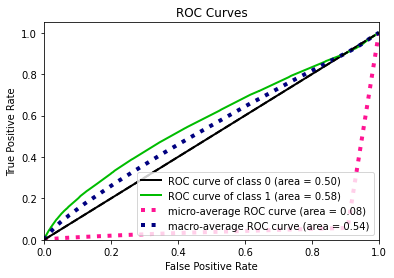

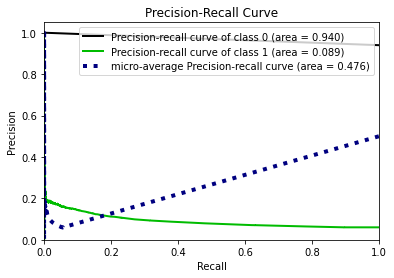

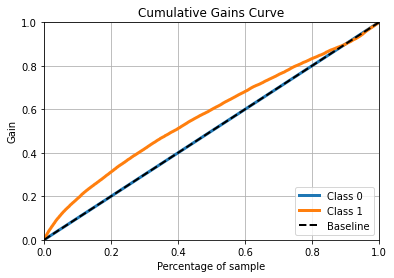

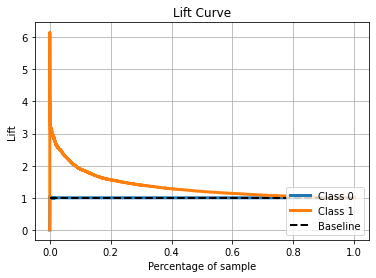

In [32]:
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve
plot_roc(y_test, y_score1)
plt.show()
    
plot_precision_recall(y_test, y_score1)
plt.show()
    
plot_cumulative_gain(y_test, y_score1)
plt.show()
    
plot_lift_curve(y_test, y_score1)
plt.show()

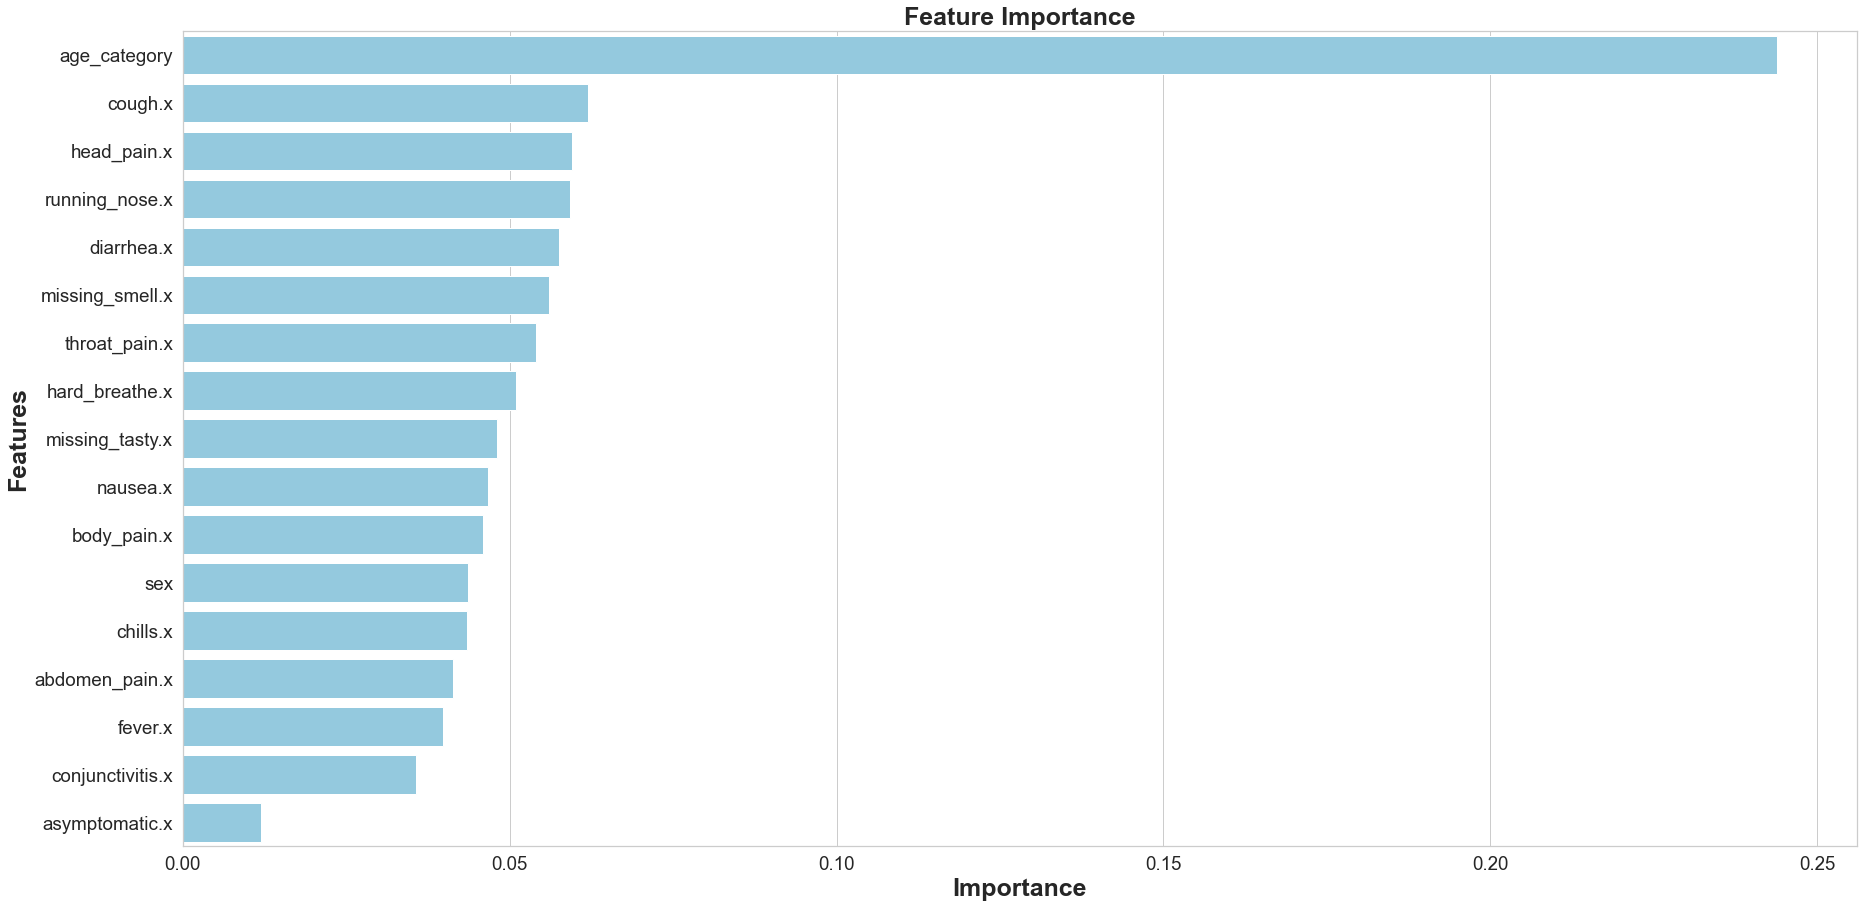

None

Features  Gini-Importance
0       age_category         0.243796
1            cough.x         0.062020
2        head_pain.x         0.059501
3     running_nose.x         0.059205
4         diarrhea.x         0.057552
5    missing_smell.x         0.056028
6      throat_pain.x         0.054066
7     hard_breathe.x         0.050997
8    missing_tasty.x         0.048109
9           nausea.x         0.046717
10       body_pain.x         0.045930
11               sex         0.043617
12          chills.x         0.043506
13    abdomen_pain.x         0.041423
14           fever.x         0.039825
15  conjunctivitis.x         0.035671
16    asymptomatic.x         0.012036

In [33]:
feats = {}
for feature, importance in zip(df1.columns, rfc.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

# Random Forest 
- (Random Over Sampler)

In [40]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\erick\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [41]:
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(sampling_strategy = 'minority', random_state=42)
X_res, y_res = over_sampler.fit_resample(X_train, y_train)

In [42]:
rfc = RandomForestClassifier(criterion='entropy')
rfc.fit(X_res, y_res)

RandomForestClassifier(criterion='entropy')

In [43]:
y_pred = rfc.predict(X_test)

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.74      0.83    369868
           1       0.08      0.36      0.13     23591

    accuracy                           0.72    393459
   macro avg       0.52      0.55      0.48    393459
weighted avg       0.90      0.72      0.79    393459



In [45]:
print(confusion_matrix(y_test, y_pred))

[[274954  94914]
 [ 15059   8532]]


In [46]:
a_s = accuracy_score(y_test, y_pred)
print(a_s)

0.7204969259821227


In [47]:
f1 = f1_score(y_test, y_pred)
print(f1)

0.13432307123121612


In [48]:
y_score = rfc.predict_proba(X_test)
print(y_score)

[[0.57683826 0.42316174]
 [0.50640436 0.49359564]
 [0.60388332 0.39611668]
 ...
 [0.51636855 0.48363145]
 [0.64603113 0.35396887]
 [0.5368827  0.4631173 ]]


In [49]:
fpr0, tpr0, thresholds = roc_curve(y_test, y_score[:, 1])

In [50]:
roc_auc0 = auc(fpr0, tpr0)

In [51]:
thresholds

array([2.00000000e+00, 1.00000000e+00, 9.90000000e-01, ...,
       8.51063830e-04, 8.33333333e-04, 0.00000000e+00])

Youden's J statistic
- https://en.wikipedia.org/wiki/Youden%27s_J_statistic

In [52]:
J = tpr0 - fpr0
print(J)

[ 0.          0.00318466  0.00317926 ... -0.00163974 -0.00165056
  0.        ]


In [53]:
ix = argmax(J)
print(ix)

4242


In [54]:
y_score1 = np.array([[1, y[1]] if y[0] >= ix else [0, y[1]] for y in y_score])
print(y_score1)

[[0.         0.42316174]
 [0.         0.49359564]
 [0.         0.39611668]
 ...
 [0.         0.48363145]
 [0.         0.35396887]
 [0.         0.4631173 ]]


In [55]:
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=42)
X_res, y_res = over_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({0: 750772, 1: 750772})
Testing target statistics: Counter({0: 369868, 1: 23591})


In [56]:
#roc_auc_ros,fpr_ros,tpr_ros, _ = build_and_test(X_res, X_test, y_res, y_test)

# Resultado Random Forest 
- (Random OverSample)

In [57]:
print('A matriz de classificação: %s' % (classification_report(y_test, y_pred)) )
print('A matriz de confusão: %s' % (confusion_matrix(y_test, y_pred)) )
print('A acurácia do modelo: %s' % accuracy_score(y_test, y_pred) )
print('Valor do F1-score: %s' % f1_score(y_test, y_pred) )



A matriz de classificação:               precision    recall  f1-score   support

           0       0.95      0.74      0.83    369868
           1       0.08      0.36      0.13     23591

    accuracy                           0.72    393459
   macro avg       0.52      0.55      0.48    393459
weighted avg       0.90      0.72      0.79    393459

A matriz de confusão: [[274954  94914]
 [ 15059   8532]]
A acurácia do modelo: 0.7204969259821227
Valor do F1-score: 0.13432307123121612


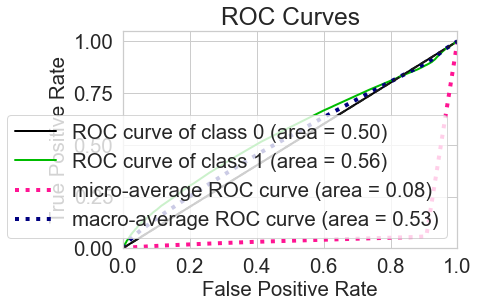

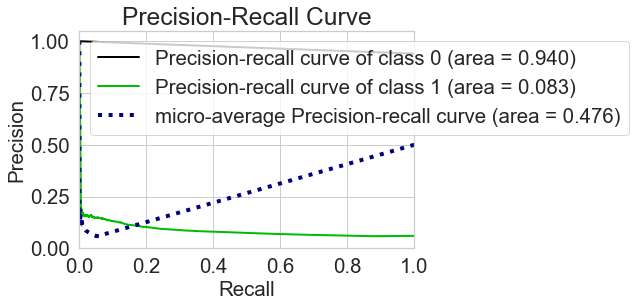

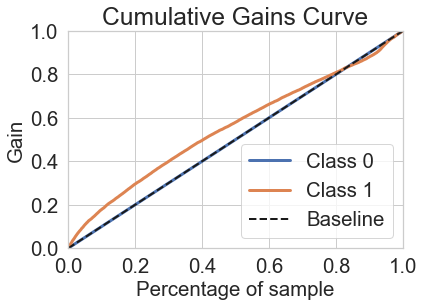

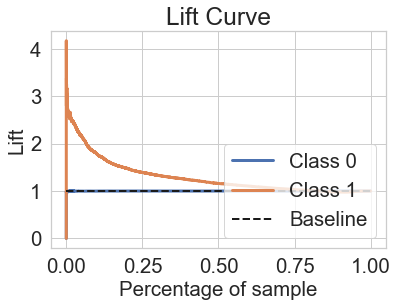

In [58]:
plot_roc(y_test, y_score1)
plt.show()
    
plot_precision_recall(y_test, y_score1)
plt.show()
    
plot_cumulative_gain(y_test, y_score1)
plt.show()
    
plot_lift_curve(y_test, y_score1)
plt.show()

# PCA

In [59]:
from sklearn.decomposition import PCA

In [60]:
pca = PCA(n_components=15)
pca_df = pca.fit_transform(scaled_X)
variancia = round(sum(pca.explained_variance_ratio_), 2)

In [61]:
y = df.result_igm
type(y)

pandas.core.series.Series

In [62]:
pca_df[:,:9].shape

(1192297, 9)

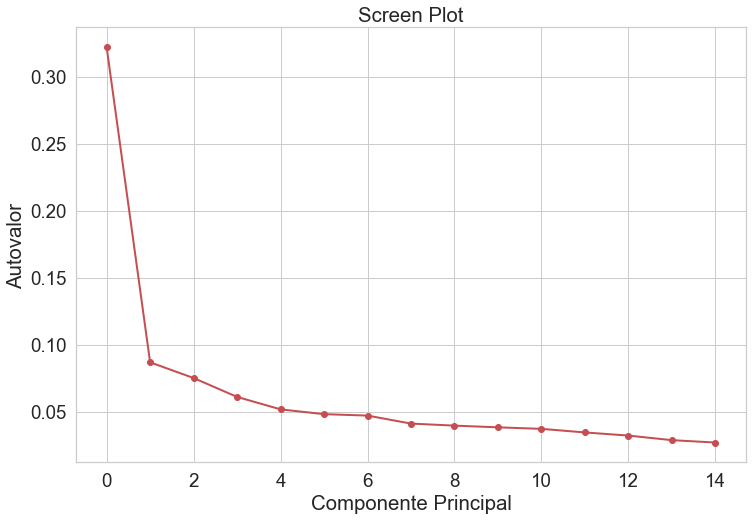

In [63]:
import numpy as np
fig = plt.figure(figsize=(12,8))

plt.plot(pca.explained_variance_ratio_,  'ro-', linewidth=2)
plt.title('Screen Plot')
plt.xlabel('Componente Principal')
plt.ylabel('Autovalor')

plt.show()

# Random Forest 
- Smote

In [64]:
from imblearn.over_sampling import SMOTE
over_sampler = SMOTE(k_neighbors=2)
X_res, y_res = over_sampler.fit_resample(X_train, y_train)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=100)
print(f"Estatistica de treinamento do target X: {Counter(y_train)}")
print(f"Estatistica de treinamento do target y: {Counter(y_test)}")

Estatistica de treinamento do target X: Counter({1: 525839, 0: 525241})
Estatistica de treinamento do target y: Counter({0: 225531, 1: 224933})


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [67]:
rfc = RandomForestClassifier(criterion='entropy')
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [68]:
y_pred = rfc.predict(X_test)

In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97    369741
           1       0.15      0.01      0.01     23718

    accuracy                           0.94    393459
   macro avg       0.55      0.50      0.49    393459
weighted avg       0.89      0.94      0.91    393459



In [70]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [71]:
print(confusion_matrix(y_test, y_pred))

[[368868    873]
 [ 23562    156]]


In [72]:
a_s = accuracy_score(y_test, y_pred)
print(a_s)

0.9378969600390383


In [73]:
f1 = f1_score(y_test, y_pred)
print(f1)

0.012607588798642261


In [74]:
y_score = rfc.predict_proba(X_test)
print(y_score)

[[0.77527294 0.22472706]
 [0.95908028 0.04091972]
 [0.95135951 0.04864049]
 ...
 [0.93860076 0.06139924]
 [0.94886326 0.05113674]
 [0.94886326 0.05113674]]


In [75]:
fpr0, tpr0, thresholds = roc_curve(y_test, y_score[:, 1])

In [76]:
roc_auc0 = auc(fpr0, tpr0)

In [77]:
thresholds

array([1.98333333e+00, 9.83333333e-01, 9.80000000e-01, ...,
       1.02040816e-04, 9.61538462e-05, 0.00000000e+00])

Youden's J statistic
- https://en.wikipedia.org/wiki/Youden%27s_J_statistic

In [78]:
J = tpr0 - fpr0
print(J)



[ 0.00000000e+00 -2.70459592e-06  3.40482832e-05 ... -3.51613616e-03
 -3.52424995e-03  0.00000000e+00]


In [79]:
ix = argmax(J)
print(ix)

6361


In [80]:
y_score1 = np.array([[1, y[1]] if y[0] >= ix else [0, y[1]] for y in y_score])
print(y_score1)

[[0.         0.22472706]
 [0.         0.04091972]
 [0.         0.04864049]
 ...
 [0.         0.06139924]
 [0.         0.05113674]
 [0.         0.05113674]]


# Resultado Random Forest
 - Smote

In [81]:
print('A matriz de classificação: %s' % (classification_report(y_test, y_pred)) )
print('A matriz de confusão: %s' % (confusion_matrix(y_test, y_pred)) )
print('A acurácia do modelo: %s' % accuracy_score(y_test, y_pred) )
print('Valor do F1-score: %s' % f1_score(y_test, y_pred) )



A matriz de classificação:               precision    recall  f1-score   support

           0       0.94      1.00      0.97    369741
           1       0.15      0.01      0.01     23718

    accuracy                           0.94    393459
   macro avg       0.55      0.50      0.49    393459
weighted avg       0.89      0.94      0.91    393459

A matriz de confusão: [[368868    873]
 [ 23562    156]]
A acurácia do modelo: 0.9378969600390383
Valor do F1-score: 0.012607588798642261


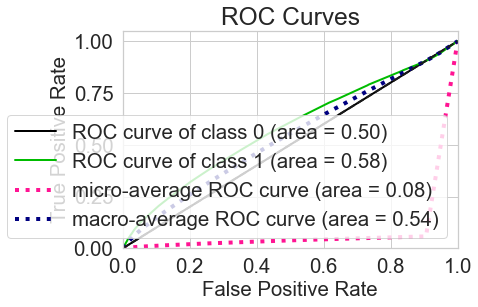

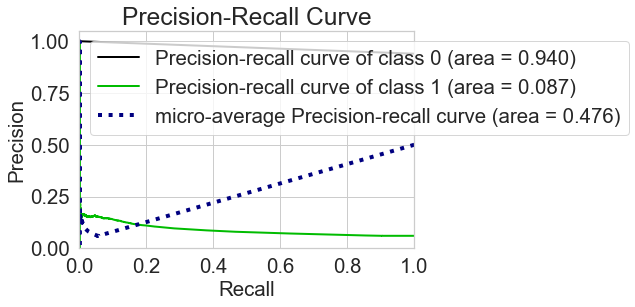

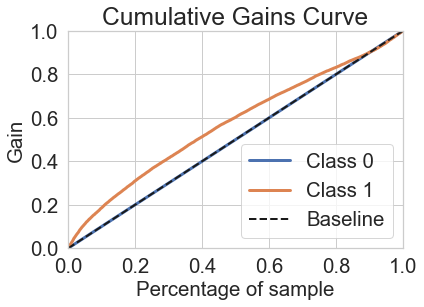

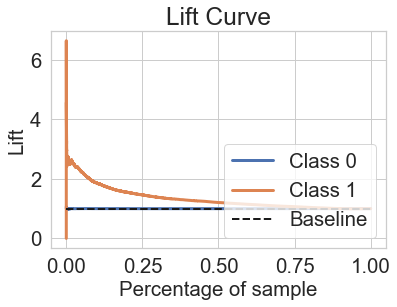

In [82]:
plot_roc(y_test, y_score1)
plt.show()
    
plot_precision_recall(y_test, y_score1)
plt.show()
    
plot_cumulative_gain(y_test, y_score1)
plt.show()
    
plot_lift_curve(y_test, y_score1)
plt.show()

# Random Forest DEF ✅

In [100]:

import scikitplot as skplt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay
from numpy import argmax
import numpy as np

def build_and_test(X_tr, X_te, y_tr, y_te, class_weight=None, threshold=False):
    
    # Construindo PCA
    pca = PCA(n_components=15)
    pca.fit(X_tr.tolist())
    X_pca = pca.transform(X_tr.tolist())

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_tr, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
    plt.show()
    
    # Construindo Modelo
    if class_weight:
        model = RandomForestClassifier(class_weight = class_weight , criterion='entropy')
    else:
        model = RandomForestClassifier(criterion='entropy')
    model.fit(X_tr, y_tr)
    
    # Teste do modelo
    y_pred = model.predict(X_te)
    print('Resultado da prescisão %s' % precision_score(y_te, y_pred))
    print('Resultado do recall %s' % recall_score(y_te, y_pred))
    print('Resultado F1 %s' % f1_score(y_te, y_pred))
    print('Resultado acurácia %s' % accuracy_score(y_te, y_pred))
    
    y_score = model.predict_proba(X_te)
    fpr0, tpr0, thresholds = roc_curve(y_te, y_score[:, 1])
    roc_auc0 = auc(fpr0, tpr0)
    cm1 = confusion_matrix(y_test, y_pred)
    total1 = sum(sum(cm1))
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    print('Sensibilidade:  %s' % sensi)
    print('Especificação:  %s' % speci)
    # Calculando o melhor threashold
    best_threshold = None
    if threshold:
        J = tpr0 - fpr0
        ix = argmax(J) # valor da maior estatística 
        best_threshold = thresholds[ix]
        # ajuste de acordo com o threshold.
        y_score = np.array([[1, y[1]] if y[0] >= best_threshold else [0, y[1]] for y in y_score])
        
    # Plot 
    plot_roc(y_te, y_score)
    plt.show()
    
    plot_precision_recall(y_te, y_score1)
    plt.show()
    
    plot_cumulative_gain(y_te, y_score1)
    plt.show()
    
    plot_lift_curve(y_te, y_score)
    plt.show()
    
    # Print
    print(classification_report(y_te,y_pred))
    print(confusion_matrix(y_test, y_pred))
    return roc_auc0,fpr0,tpr0, best_threshold

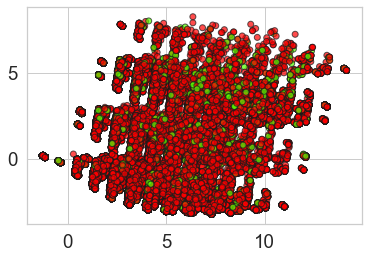

Resultado da prescisão 0.17849686847599164
Resultado do recall 0.007274428893521079
Resultado F1 0.013979153893316982
Resultado acurácia 0.9386899270317873
Sensibilidade:  0.007274428893521079
Especificação:  0.9978726969985295


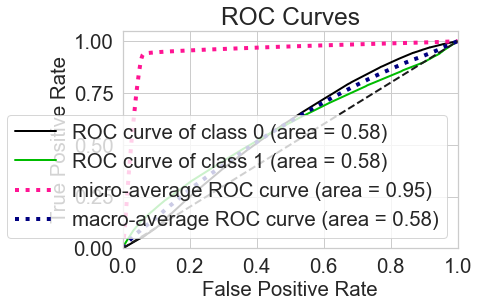

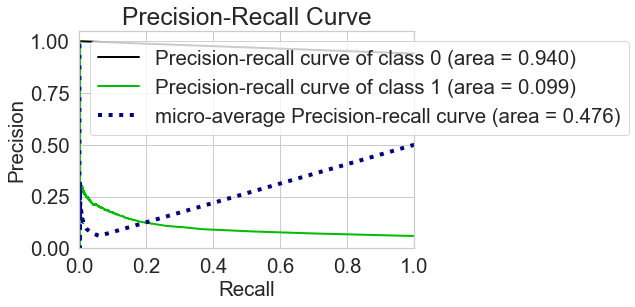

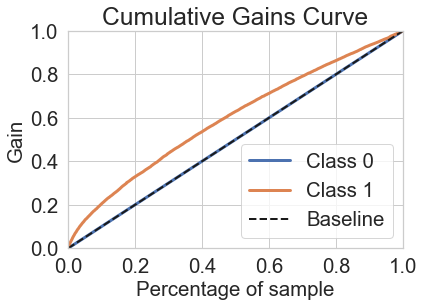

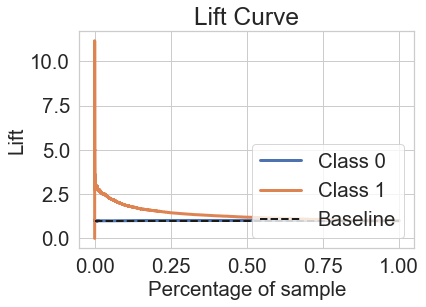

              precision    recall  f1-score   support

           0       0.94      1.00      0.97    369952
           1       0.18      0.01      0.01     23507

    accuracy                           0.94    393459
   macro avg       0.56      0.50      0.49    393459
weighted avg       0.90      0.94      0.91    393459

[[369165    787]
 [ 23336    171]]


In [101]:
roc_auc_imb,fpr_imb,tpr_imb, _ = build_and_test(X_train, X_test, y_train, y_test)

- Oversample

In [102]:
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=42)
X_res, y_res = over_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({0: 750688, 1: 750688})
Testing target statistics: Counter({0: 369952, 1: 23507})


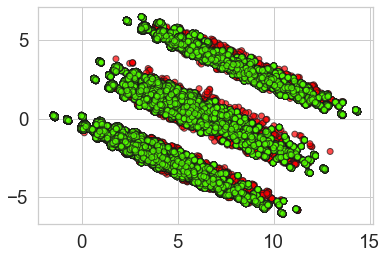

Resultado da prescisão 0.08205571565802114
Resultado do recall 0.3633811205172927
Resultado F1 0.13387980283213305
Resultado acurácia 0.7190990675013152
Sensibilidade:  0.3633811205172927
Especificação:  0.7417016261569068


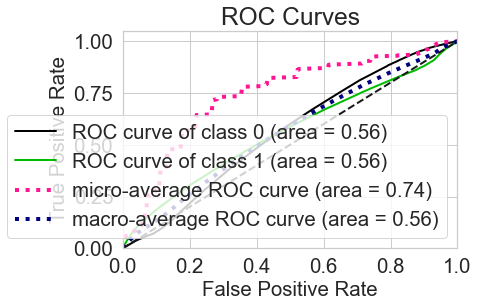

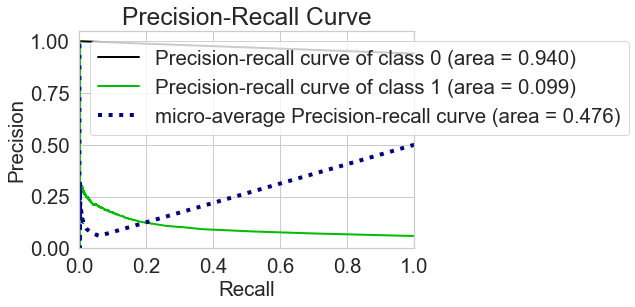

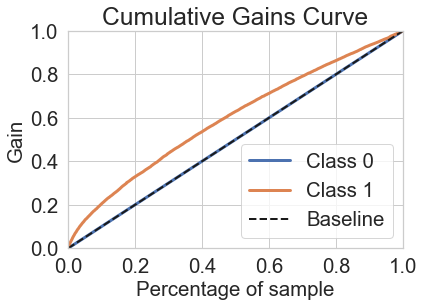

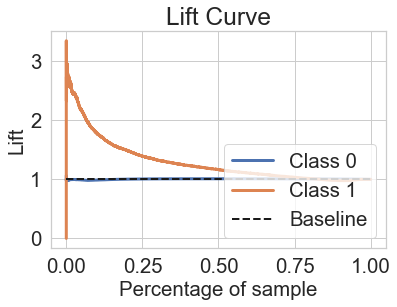

              precision    recall  f1-score   support

           0       0.95      0.74      0.83    369952
           1       0.08      0.36      0.13     23507

    accuracy                           0.72    393459
   macro avg       0.52      0.55      0.48    393459
weighted avg       0.90      0.72      0.79    393459

[[274394  95558]
 [ 14965   8542]]


In [103]:
roc_auc_ros,fpr_ros,tpr_ros, _ = build_and_test(X_res, X_test, y_res, y_test)

- SMOTE

In [104]:
from imblearn.over_sampling import SMOTE
over_sampler = SMOTE(k_neighbors=2)
X_res, y_res = over_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({0: 750688, 1: 750688})
Testing target statistics: Counter({0: 369952, 1: 23507})


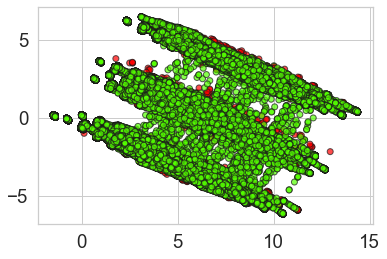

Resultado da prescisão 0.08008847227342146
Resultado do recall 0.3234781129025397
Resultado F1 0.12838955863978657
Resultado acurácia 0.7375990891045827
Sensibilidade:  0.3234781129025397
Especificação:  0.7639126156906842


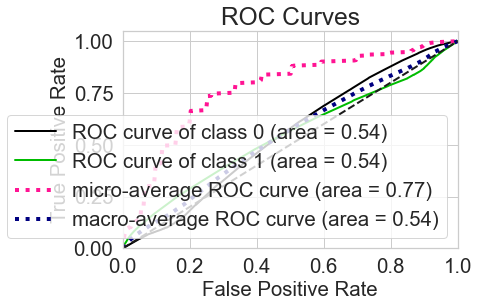

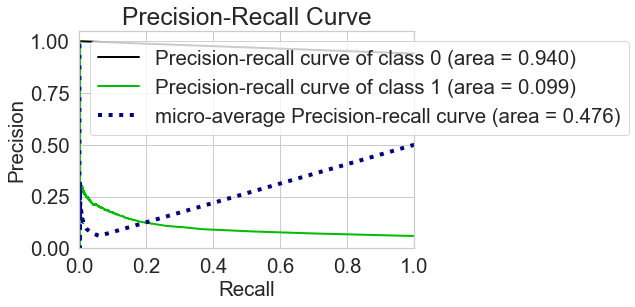

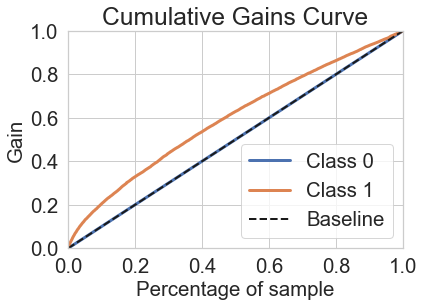

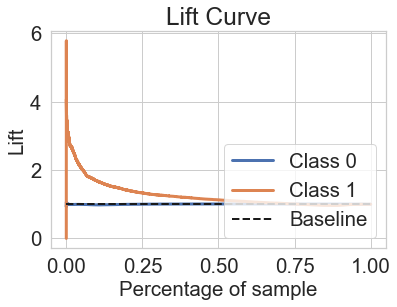

              precision    recall  f1-score   support

           0       0.95      0.76      0.85    369952
           1       0.08      0.32      0.13     23507

    accuracy                           0.74    393459
   macro avg       0.51      0.54      0.49    393459
weighted avg       0.89      0.74      0.80    393459

[[282611  87341]
 [ 15903   7604]]


In [105]:
roc_auc_smote,fpr_smote,tpr_smote, _  = build_and_test(X_res, X_test, y_res, y_test)

- UnderSampler

In [106]:
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=42)
X_res, y_res = under_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({0: 48150, 1: 48150})
Testing target statistics: Counter({0: 369952, 1: 23507})


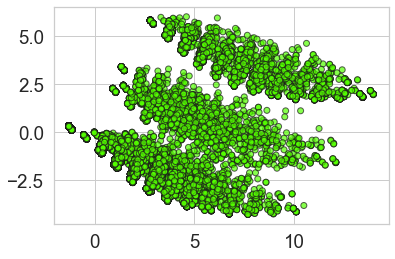

Resultado da prescisão 0.06382466281310212
Resultado do recall 0.5411154124303399
Resultado F1 0.1141815864238812
Resultado acurácia 0.4983899211861973
Sensibilidade:  0.5411154124303399
Especificação:  0.49567511460946284


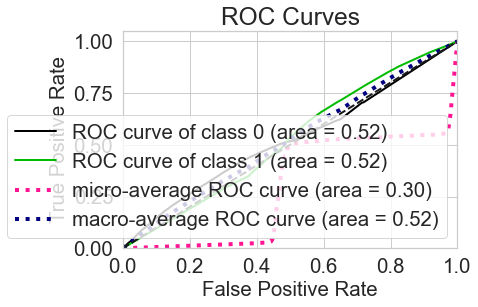

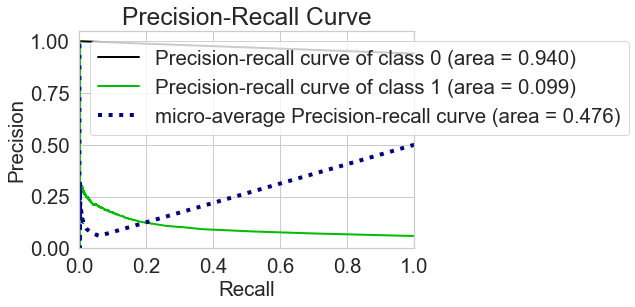

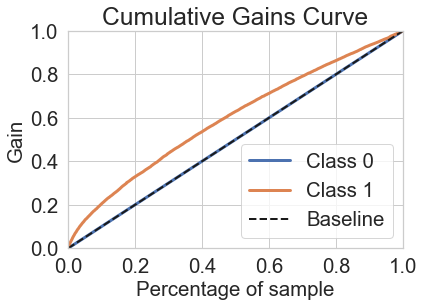

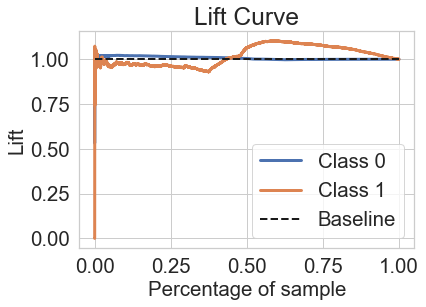

              precision    recall  f1-score   support

           0       0.94      0.50      0.65    369952
           1       0.06      0.54      0.11     23507

    accuracy                           0.50    393459
   macro avg       0.50      0.52      0.38    393459
weighted avg       0.89      0.50      0.62    393459

[[183376 186576]
 [ 10787  12720]]


In [115]:
roc_auc_rus1,fpr_rus1,tpr_rus1 , _ = build_and_test(X_res, X_test, y_res, y_test)

- NearMiss

In [108]:
from imblearn.under_sampling import NearMiss
under_sampler = NearMiss()
X_res, y_res = under_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({0: 48150, 1: 48150})
Testing target statistics: Counter({0: 369952, 1: 23507})


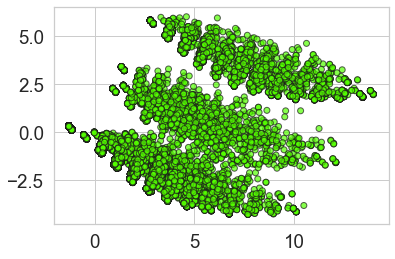

Resultado da prescisão 0.06390015256142605
Resultado do recall 0.5416684391883269
Resultado F1 0.11431469984872358
Resultado acurácia 0.4985373317169006
Sensibilidade:  0.5416684391883269
Especificação:  0.4957967520110717


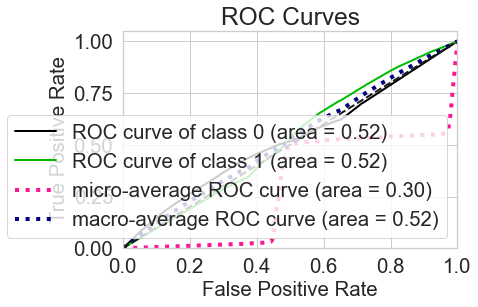

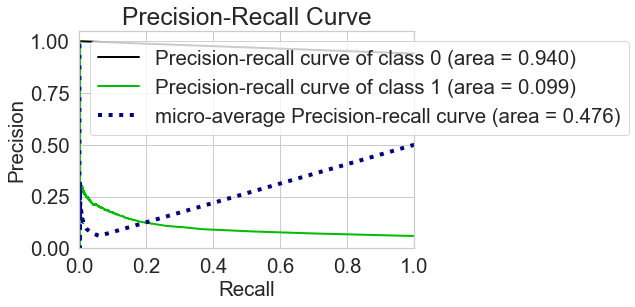

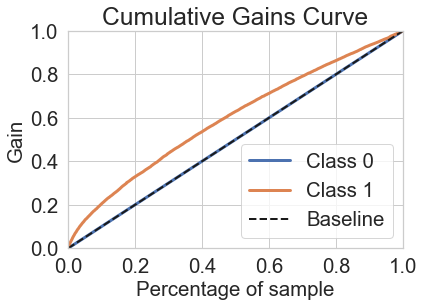

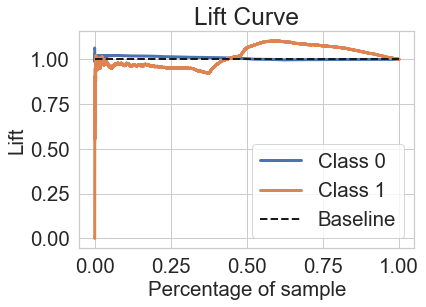

              precision    recall  f1-score   support

           0       0.94      0.50      0.65    369952
           1       0.06      0.54      0.11     23507

    accuracy                           0.50    393459
   macro avg       0.50      0.52      0.38    393459
weighted avg       0.89      0.50      0.62    393459

[[183421 186531]
 [ 10774  12733]]


In [109]:
roc_auc_nm,fpr_nm,tpr_nm, _  = build_and_test(X_res, X_test, y_res, y_test)

- CW

In [110]:
n= Counter(y_train)
ratio = int(n[0]/n[1])
ratio, n

(15, Counter({0: 750688, 1: 48150}))

In [111]:
n[0]

750688

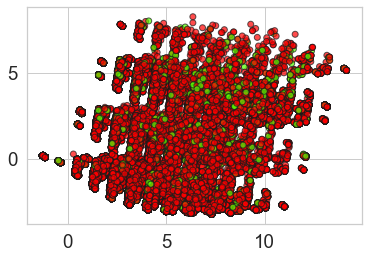

Resultado da prescisão 0.08321573517989783
Resultado do recall 0.32360573446207513
Resultado F1 0.13238774799860775
Resultado acurácia 0.7465911314774856
Sensibilidade:  0.32360573446207513
Especificação:  0.7734679093504022


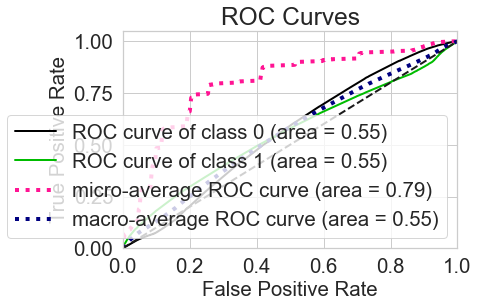

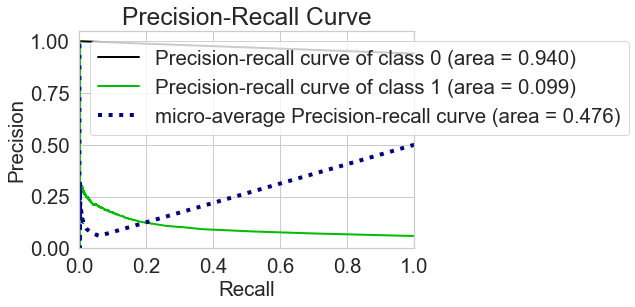

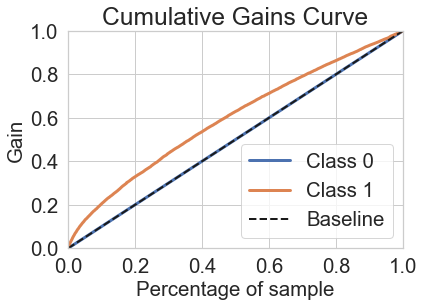

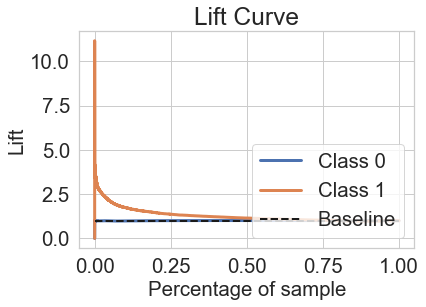

              precision    recall  f1-score   support

           0       0.95      0.77      0.85    369952
           1       0.08      0.32      0.13     23507

    accuracy                           0.75    393459
   macro avg       0.52      0.55      0.49    393459
weighted avg       0.90      0.75      0.81    393459

[[286146  83806]
 [ 15900   7607]]


In [112]:
roc_auc_cw,fpr_cw,tpr_cw, _  = build_and_test(X_train, X_test, y_train, y_test, class_weight={0:1, 1:ratio})

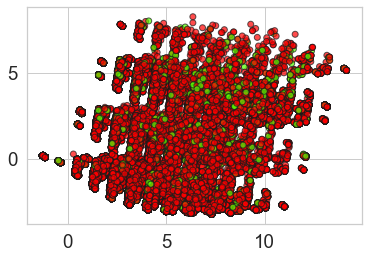

Resultado da prescisão 0.17868020304568527
Resultado do recall 0.007487131492746842
Resultado F1 0.014372039849746856
Resultado acurácia 0.938646720496926
Sensibilidade:  0.007487131492746842
Especificação:  0.9978132298244097


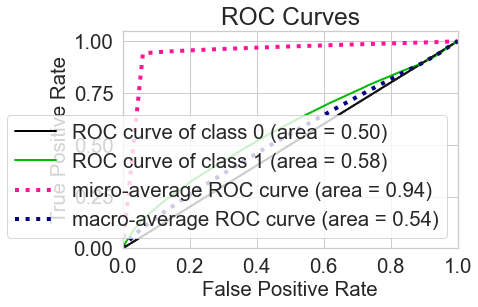

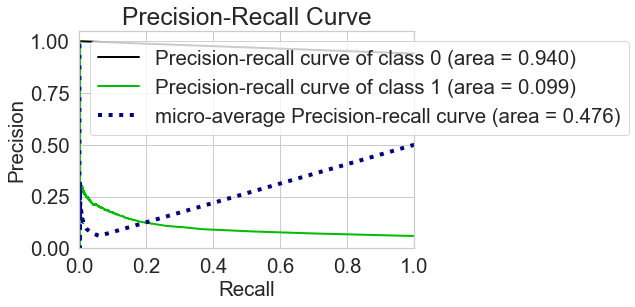

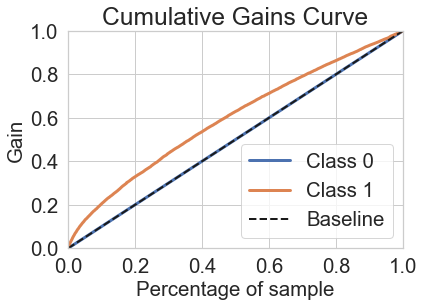

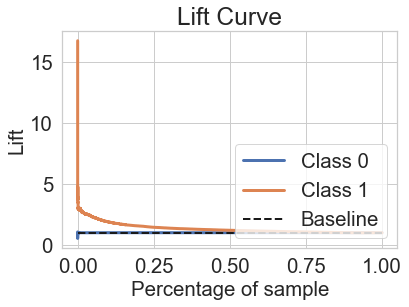

              precision    recall  f1-score   support

           0       0.94      1.00      0.97    369952
           1       0.18      0.01      0.01     23507

    accuracy                           0.94    393459
   macro avg       0.56      0.50      0.49    393459
weighted avg       0.90      0.94      0.91    393459

[[369143    809]
 [ 23331    176]]
Best Treshold: 0.06420279314827507


In [113]:
roc_auc_thr,fpr_thr,tpr_thr, threshold = build_and_test(X_train, X_test, y_train, y_test, threshold=True)
print(f"Best Treshold: {threshold}")

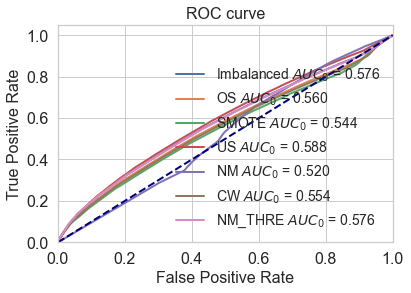

In [114]:
plt.plot(fpr_imb, tpr_imb, lw=2, label='Imbalanced $AUC_0$ = %.3f' % (roc_auc_imb))
plt.plot(fpr_ros, tpr_ros, lw=2, label='OS $AUC_0$ = %.3f' % (roc_auc_ros))
plt.plot(fpr_smote, tpr_smote, lw=2, label='SMOTE $AUC_0$ = %.3f' % (roc_auc_smote))
plt.plot(fpr_rus1, tpr_rus1, lw=2, label='US $AUC_0$ = %.3f' % (roc_auc_rus1))
plt.plot(fpr_nm, tpr_nm, lw=2, label='NM $AUC_0$ = %.3f' % (roc_auc_nm))
plt.plot(fpr_cw, tpr_cw, lw=2, label='CW $AUC_0$ = %.3f' % (roc_auc_cw))
plt.plot(fpr_thr, tpr_thr, lw=2, label='NM_THRE $AUC_0$ = %.3f' % (roc_auc_thr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

# Regressão Logistíca na mão

In [49]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
print(f"Estatísticas do target y: {Counter(y_train)}")
print(f"Estatísticas do target X: {Counter(y_test)}")

Estatísticas do target y: Counter({0: 784451, 1: 50156})
Estatísticas do target X: Counter({0: 336189, 1: 21501})


- Vectorizer, pois é Logit ???? (ValueError: Cannot center sparse matrices: pass `with_mean=False` instead. See docstring for motivation and alternatives.)

In [50]:
#vectorizer = TfidfVectorizer(binary = True)
#matrix = vectorizer.fit_transform(df1)
#X = matrix


In [51]:
X = df1

In [52]:
y = df['result_igm']

In [53]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [54]:
X = scaled_X

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
lgt = LogisticRegression()
lgt.fit(X_train, y_train)

LogisticRegression()

In [58]:
y_pred = lgt.predict(X_test)

In [59]:
print(classification_report(y_test, y_pred))

C:\Users\erick\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.94      1.00      0.97    369952
           1       0.00      0.00      0.00     23507

    accuracy                           0.94    393459
   macro avg       0.47      0.50      0.48    393459
weighted avg       0.88      0.94      0.91    393459



C:\Users\erick\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\erick\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [61]:
print(confusion_matrix(y_test, y_pred))

[[369952      0]
 [ 23507      0]]


In [62]:
a_s = accuracy_score(y_test, y_pred)
print(a_s)

0.9402555285302916


In [63]:
f1 = f1_score(y_test, y_pred)
print(f1)

0.0


In [64]:
y_score = lgt.predict_proba(X_test)
print(y_score)

[[0.95549125 0.04450875]
 [0.97007426 0.02992574]
 [0.93253407 0.06746593]
 ...
 [0.95549125 0.04450875]
 [0.96098119 0.03901881]
 [0.96098119 0.03901881]]


In [65]:
fpr0, tpr0, thresholds = roc_curve(y_test, y_score[:, 1])

In [66]:
roc_auc0 = auc(fpr0, tpr0)

In [67]:
thresholds

array([1.39677134, 0.39677134, 0.38864625, ..., 0.02022884, 0.02021884,
       0.01577534])

Youden's J statistic
- https://en.wikipedia.org/wiki/Youden%27s_J_statistic

In [68]:
J = tpr0 - fpr0
print(J)



[ 0.00000000e+00 -2.70305337e-06 -5.40610674e-06 ...  1.62183202e-05
  1.08122135e-05  0.00000000e+00]


In [69]:
ix = argmax(J)
print(ix)

10757


In [70]:
y_score1 = np.array([[1, y[1]] if y[0] >= ix else [0, y[1]] for y in y_score])
print(y_score1)

[[0.         0.04450875]
 [0.         0.02992574]
 [0.         0.06746593]
 ...
 [0.         0.04450875]
 [0.         0.03901881]
 [0.         0.03901881]]


# Resultado Regressão Logística

In [ ]:
print('A matriz de classificação: %s' % (classification_report(y_test, y_pred)) )
print('A matriz de confusão: %s' % (confusion_matrix(y_test, y_pred)) )
print('A acurácia do modelo: %s' % accuracy_score(y_test, y_pred) )
print('Valor do F1-score: %s' % f1_score(y_test, y_pred) )



C:\Users\erick\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\erick\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


A matriz de classificação:               precision    recall  f1-score   support

           0       0.94      1.00      0.97    369692
           1       0.00      0.00      0.00     23767

    accuracy                           0.94    393459
   macro avg       0.47      0.50      0.48    393459
weighted avg       0.88      0.94      0.91    393459

A matriz de confusão: [[369692      0]
 [ 23767      0]]
A acurácia do modelo: 0.9395947227030008
Valor do F1-score: 0.0


C:\Users\erick\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


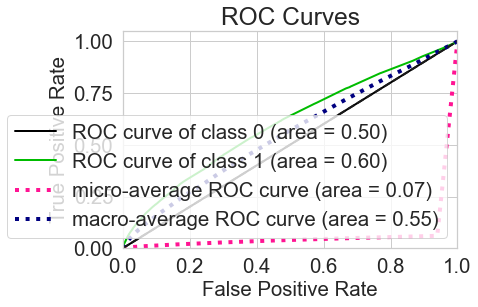

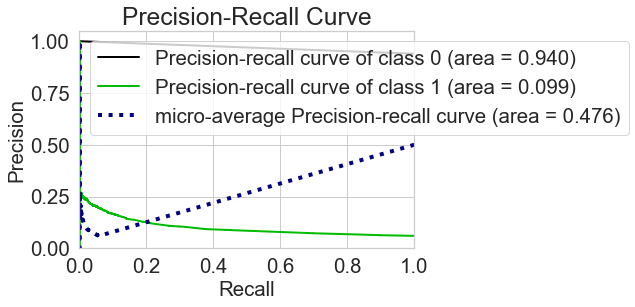

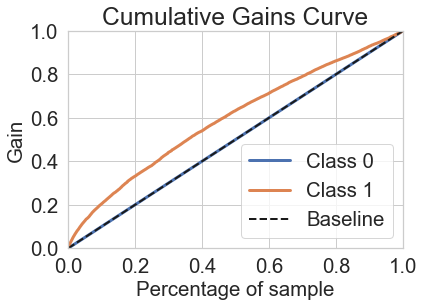

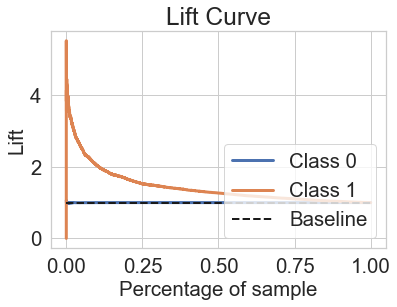

In [ ]:
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve
plot_roc(y_test, y_score1)
plt.show()
    
plot_precision_recall(y_test, y_score1)
plt.show()
    
plot_cumulative_gain(y_test, y_score1)
plt.show()
    
plot_lift_curve(y_test, y_score1)
plt.show()

# Regressão Logística DEF 

In [125]:

import scikitplot as skplt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay
from numpy import argmax
import numpy as np

def build_and_test(X_tr, X_te, y_tr, y_te, class_weight=None, threshold=False):
    
    # Construindo PCA
    pca = PCA(n_components=15)
    pca.fit(X_tr.tolist())
    X_pca = pca.transform(X_tr.tolist())

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_tr, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
    plt.show()
    
    # Construindo Modelo
    if class_weight:
        model = LogisticRegression()
    else:
        model = LogisticRegression()
    model.fit(X_tr, y_tr)
    
    # Teste do modelo
    y_pred = model.predict(X_te)
    print('Resultado da prescisão %s' % precision_score(y_te, y_pred))
    print('Resultado do recall %s' % recall_score(y_te, y_pred))
    print('Resultado F1 %s' % f1_score(y_te, y_pred))
    print('Resultado acurácia %s' % accuracy_score(y_te, y_pred))
    
    y_score = model.predict_proba(X_te)
    fpr0, tpr0, thresholds = roc_curve(y_te, y_score[:, 1])
    roc_auc0 = auc(fpr0, tpr0)
    cm1 = confusion_matrix(y_test, y_pred)
    total1 = sum(sum(cm1))
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    print('Sensibilidade:  %s' % sensi)
    print('Especificação:  %s' % speci)
    
    # Calculando o melhor threashold
    best_threshold = None
    if threshold:
        J = tpr0 - fpr0
        ix = argmax(J) # valor da maior estatística 
        best_threshold = thresholds[ix]
        # ajuste de acordo com o threshold.
        y_score = np.array([[1, y[1]] if y[0] >= best_threshold else [0, y[1]] for y in y_score])
        
    # Plot 
    plot_roc(y_te, y_score)
    plt.show()
    
    plot_precision_recall(y_te, y_score1)
    plt.show()
    
    plot_cumulative_gain(y_te, y_score1)
    plt.show()
    
    plot_lift_curve(y_te, y_score)
    plt.show()
    
    # Print
    print(classification_report(y_te,y_pred))
    print(confusion_matrix(y_test, y_pred))
    return roc_auc0,fpr0,tpr0, best_threshold

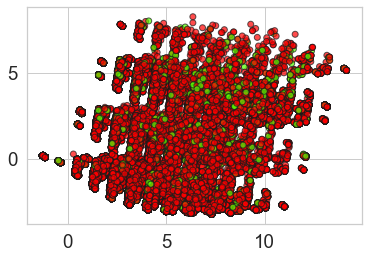

C:\Users\erick\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Resultado da prescisão 0.0
Resultado do recall 0.0
Resultado F1 0.0
Resultado acurácia 0.9402555285302916


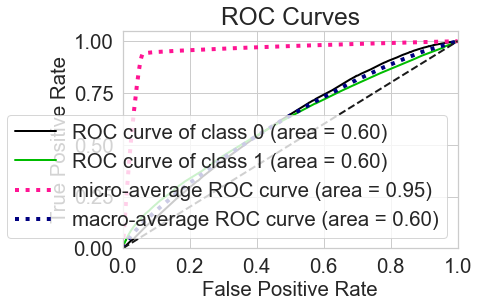

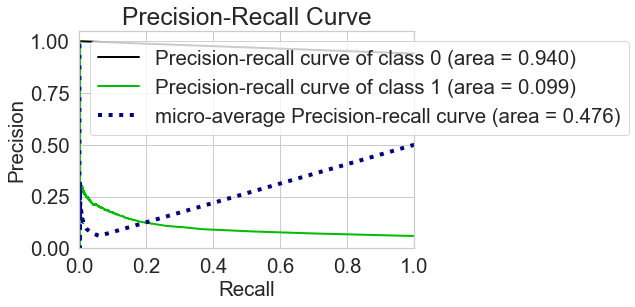

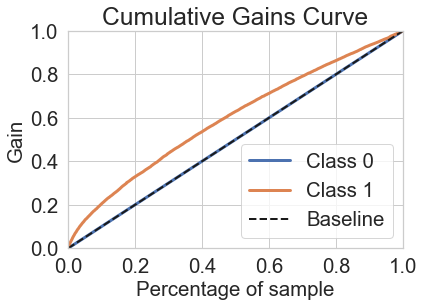

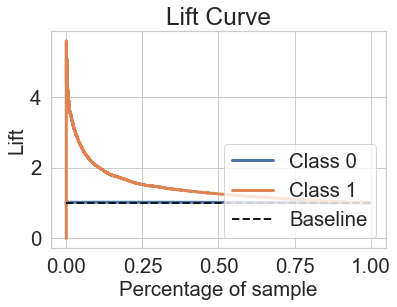

C:\Users\erick\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\erick\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.94      1.00      0.97    369952
           1       0.00      0.00      0.00     23507

    accuracy                           0.94    393459
   macro avg       0.47      0.50      0.48    393459
weighted avg       0.88      0.94      0.91    393459

[[369952      0]
 [ 23507      0]]


C:\Users\erick\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:
roc_auc_imb,fpr_imb,tpr_imb, _ = build_and_test(X_train, X_test, y_train, y_test)

- Oversample 🏆

In [117]:
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=42)
X_res, y_res = over_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({0: 750688, 1: 750688})
Testing target statistics: Counter({0: 369952, 1: 23507})


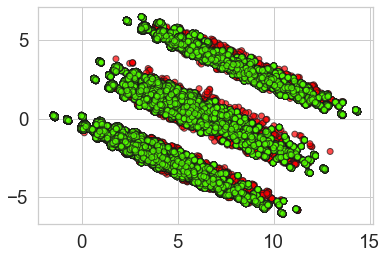

Resultado da prescisão 0.08625213545966535
Resultado do recall 0.44888756540604924
Resultado F1 0.14470057457866514
Resultado acurácia 0.6829606134311326


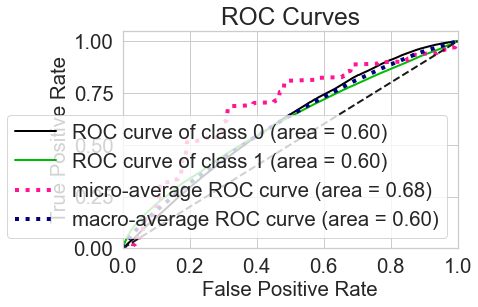

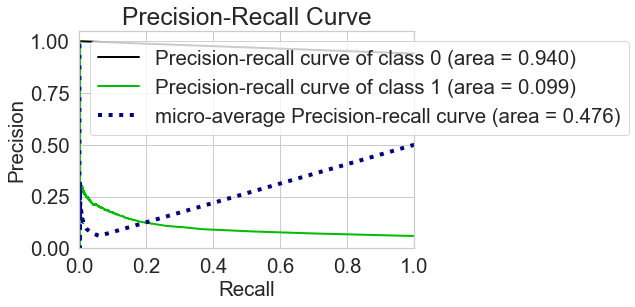

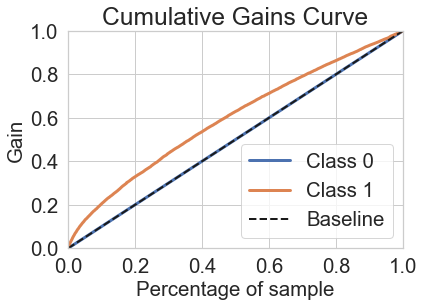

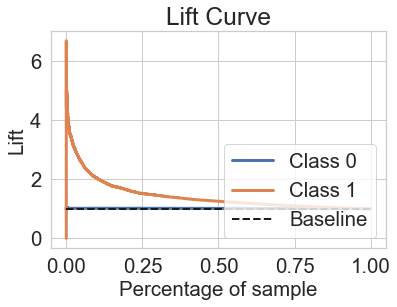

              precision    recall  f1-score   support

           0       0.95      0.70      0.81    369952
           1       0.09      0.45      0.14     23507

    accuracy                           0.68    393459
   macro avg       0.52      0.57      0.48    393459
weighted avg       0.90      0.68      0.77    393459

[[258165 111787]
 [ 12955  10552]]


In [120]:
roc_auc_ros2,fpr_ros2,tpr_ros2, _ = build_and_test(X_res, X_test, y_res, y_test)

- SMOTE

In [75]:
from imblearn.over_sampling import SMOTE
over_sampler = SMOTE(k_neighbors=2)
X_res, y_res = over_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({0: 750688, 1: 750688})
Testing target statistics: Counter({0: 369952, 1: 23507})


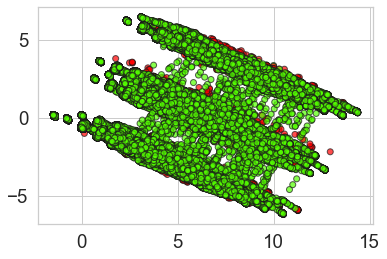

Resultado da prescisão 0.0862930850802288
Resultado do recall 0.4479516739694559
Resultado F1 0.14470944734184
Resultado acurácia 0.6836442933062912


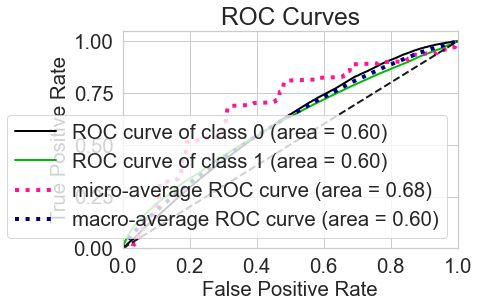

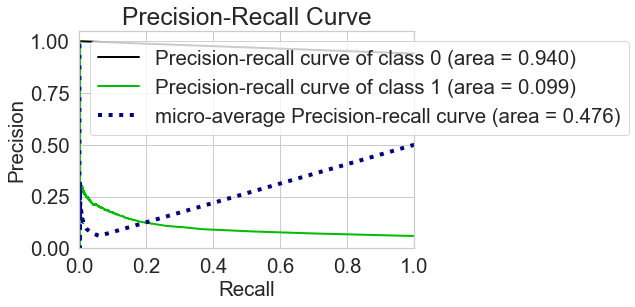

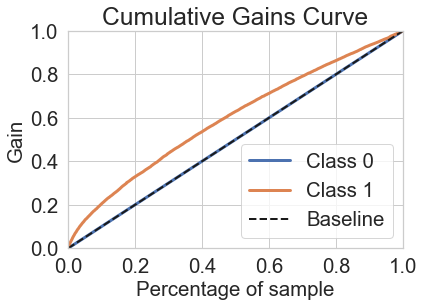

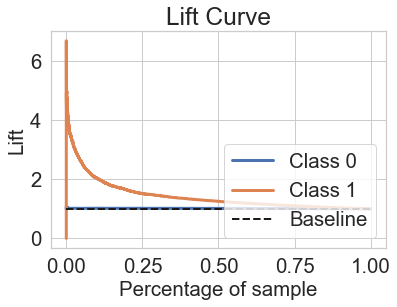

              precision    recall  f1-score   support

           0       0.95      0.70      0.81    369952
           1       0.09      0.45      0.14     23507

    accuracy                           0.68    393459
   macro avg       0.52      0.57      0.48    393459
weighted avg       0.90      0.68      0.77    393459

[[258456 111496]
 [ 12977  10530]]


In [76]:
roc_auc_smote,fpr_smote,tpr_smote, _  = build_and_test(X_res, X_test, y_res, y_test)

- UnderSampler

In [77]:
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=42)
X_res, y_res = under_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({0: 48150, 1: 48150})
Testing target statistics: Counter({0: 369952, 1: 23507})


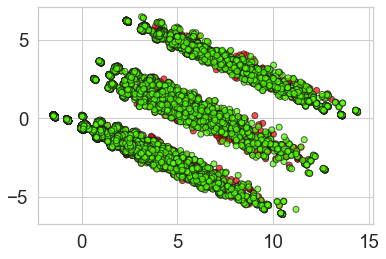

Resultado da prescisão 0.08613751247362136
Resultado do recall 0.44799421448930105
Resultado F1 0.14449284807738486
Resultado acurácia 0.6830597343052263


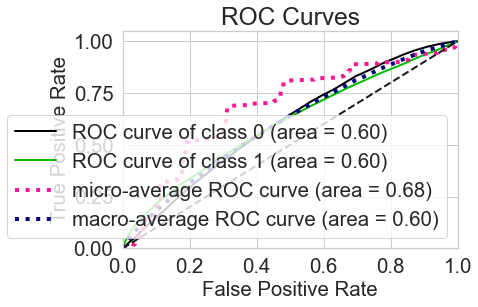

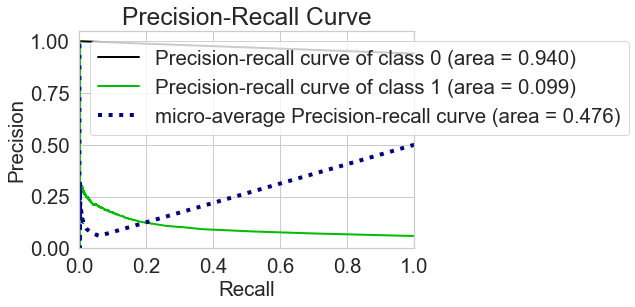

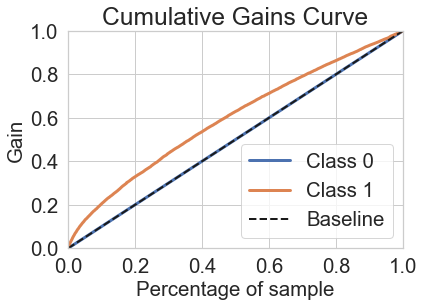

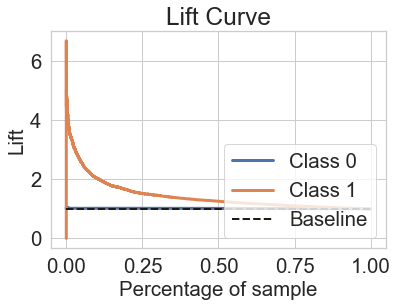

              precision    recall  f1-score   support

           0       0.95      0.70      0.81    369952
           1       0.09      0.45      0.14     23507

    accuracy                           0.68    393459
   macro avg       0.52      0.57      0.47    393459
weighted avg       0.90      0.68      0.77    393459

[[258225 111727]
 [ 12976  10531]]


In [78]:
roc_auc_rus,fpr_rus,tpr_rus , _ = build_and_test(X_res, X_test, y_res, y_test)

- NearMiss

In [79]:
from imblearn.under_sampling import NearMiss
under_sampler = NearMiss()
X_res, y_res = under_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({0: 48150, 1: 48150})
Testing target statistics: Counter({0: 369952, 1: 23507})


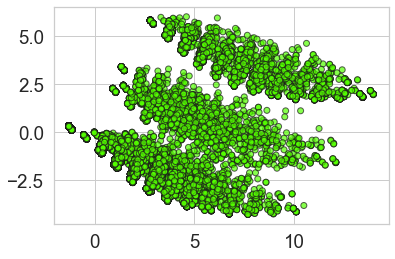

Resultado da prescisão 0.08036679787188027
Resultado do recall 0.3952014293614668
Resultado F1 0.13357104858305416
Resultado acurácia 0.6936860003202366


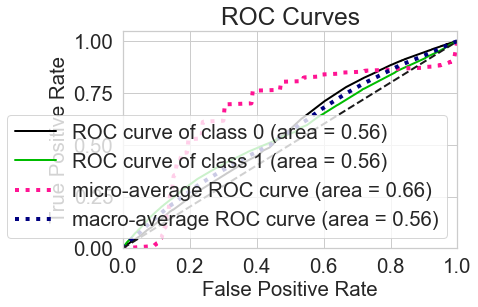

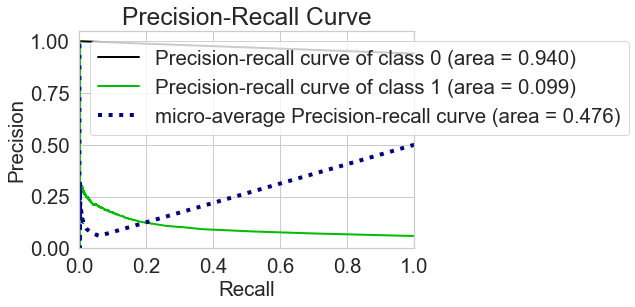

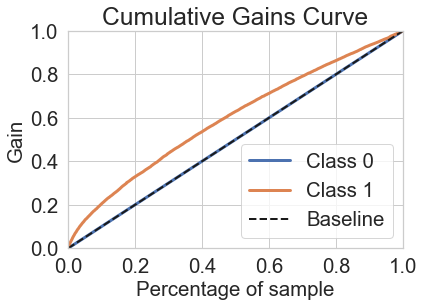

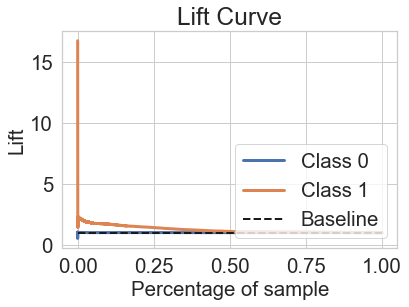

              precision    recall  f1-score   support

           0       0.95      0.71      0.81    369952
           1       0.08      0.40      0.13     23507

    accuracy                           0.69    393459
   macro avg       0.51      0.55      0.47    393459
weighted avg       0.90      0.69      0.77    393459

[[263647 106305]
 [ 14217   9290]]


In [80]:
roc_auc_nm,fpr_nm,tpr_nm, _  = build_and_test(X_res, X_test, y_res, y_test)

- Class Weight

In [81]:
n= Counter(y_train)
ratio = int(n[0]/n[1])
ratio, n

(15, Counter({0: 750688, 1: 48150}))

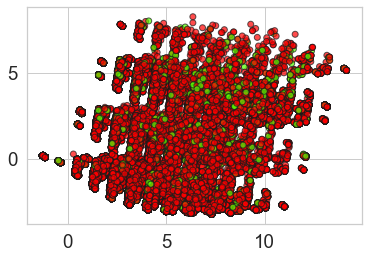

C:\Users\erick\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Resultado da prescisão 0.0
Resultado do recall 0.0
Resultado F1 0.0
Resultado acurácia 0.9402555285302916


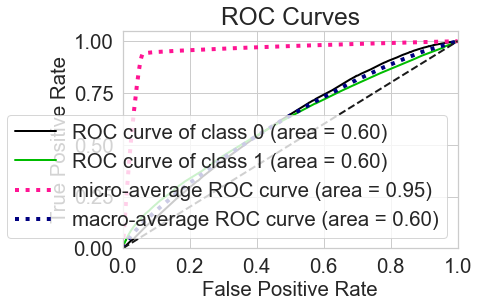

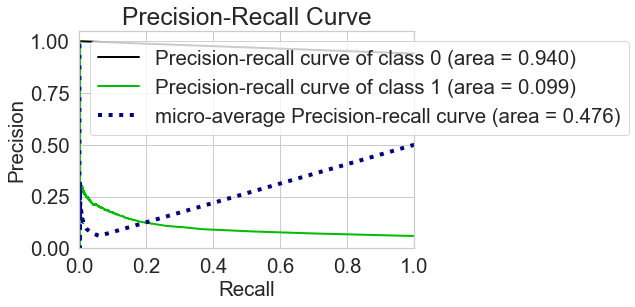

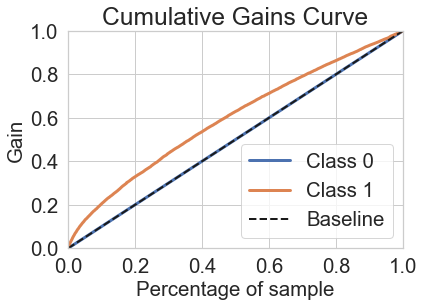

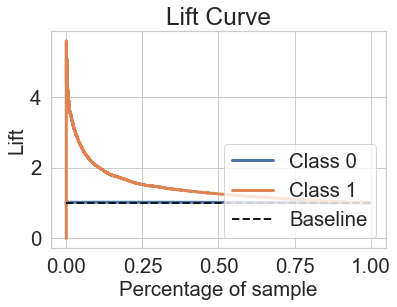

C:\Users\erick\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\erick\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.94      1.00      0.97    369952
           1       0.00      0.00      0.00     23507

    accuracy                           0.94    393459
   macro avg       0.47      0.50      0.48    393459
weighted avg       0.88      0.94      0.91    393459

[[369952      0]
 [ 23507      0]]


C:\Users\erick\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [82]:
roc_auc_cw,fpr_cw,tpr_cw, _  = build_and_test(X_train, X_test, y_train, y_test, class_weight={0:1, 1:ratio})

- Threshold

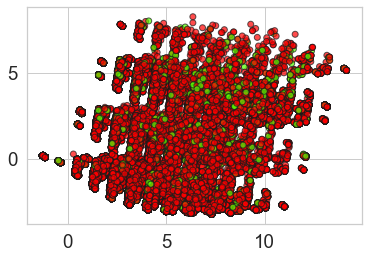

C:\Users\erick\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Resultado da prescisão 0.0
Resultado do recall 0.0
Resultado F1 0.0
Resultado acurácia 0.9402555285302916


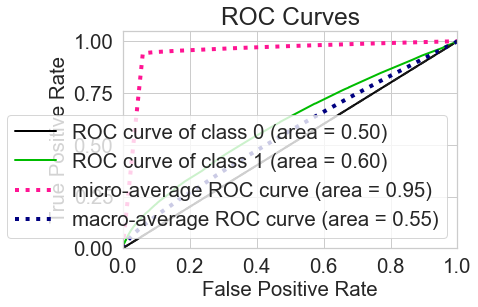

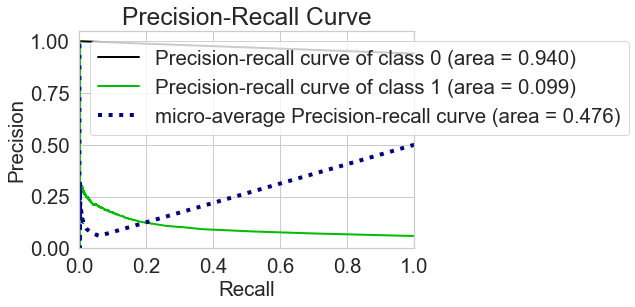

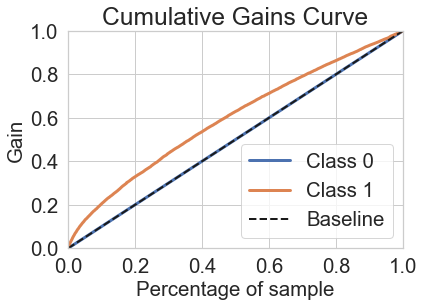

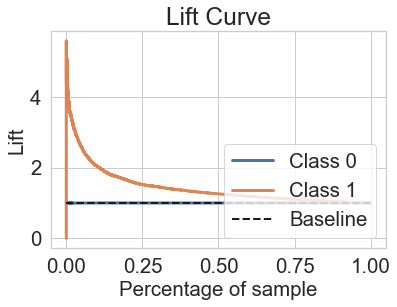

C:\Users\erick\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\erick\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.94      1.00      0.97    369952
           1       0.00      0.00      0.00     23507

    accuracy                           0.94    393459
   macro avg       0.47      0.50      0.48    393459
weighted avg       0.88      0.94      0.91    393459

[[369952      0]
 [ 23507      0]]
Best Treshold: 0.06174289609457202


C:\Users\erick\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [83]:
roc_auc_thr,fpr_thr,tpr_thr, threshold = build_and_test(X_train, X_test, y_train, y_test, threshold=True)
print(f"Best Treshold: {threshold}")

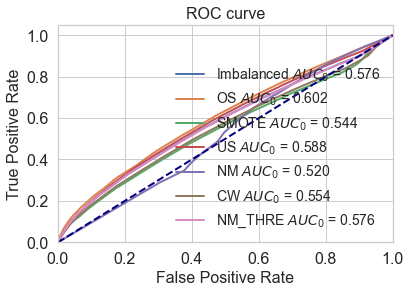

In [124]:
plt.plot(fpr_imb, tpr_imb, lw=2, label='Imbalanced $AUC_0$ = %.3f' % (roc_auc_imb))
plt.plot(fpr_ros2, tpr_ros2, lw=2, label='OS $AUC_0$ = %.3f' % (roc_auc_ros2))
plt.plot(fpr_smote, tpr_smote, lw=2, label='SMOTE $AUC_0$ = %.3f' % (roc_auc_smote))
plt.plot(fpr_rus, tpr_rus, lw=2, label='US $AUC_0$ = %.3f' % (roc_auc_rus))
plt.plot(fpr_nm, tpr_nm, lw=2, label='NM $AUC_0$ = %.3f' % (roc_auc_nm))
plt.plot(fpr_cw, tpr_cw, lw=2, label='CW $AUC_0$ = %.3f' % (roc_auc_cw))
plt.plot(fpr_thr, tpr_thr, lw=2, label='NM_THRE $AUC_0$ = %.3f' % (roc_auc_thr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
X = df1

In [ ]:
y = df['result_igm']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [ ]:
X = scaled_X

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
d_t = DecisionTreeClassifier()
d_t.fit(X_train, y_train)

In [ ]:
y_pred = d_t.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
print(confusion_matrix(y_test, y_pred))

In [ ]:
a_s = accuracy_score(y_test, y_pred)
print(a_s)

In [ ]:
f1 = f1_score(y_test, y_pred)
print(f1)

In [ ]:
y_score = d_t.predict_proba(X_test)
print(y_score)

In [ ]:
fpr0, tpr0, thresholds = roc_curve(y_test, y_score[:, 1])

In [ ]:
roc_auc0 = auc(fpr0, tpr0)

In [ ]:
thresholds

Youden's J statistic
- https://en.wikipedia.org/wiki/Youden%27s_J_statistic

In [ ]:
J = tpr0 - fpr0
print(J)



In [ ]:
ix = argmax(J)
print(ix)

In [ ]:
y_score1 = np.array([[1, y[1]] if y[0] >= ix else [0, y[1]] for y in y_score])
print(y_score1)

# Resultado Decision Tree 

In [ ]:
print('A matriz de classificação: %s' % (classification_report(y_test, y_pred)) )
print('A matriz de confusão: %s' % (confusion_matrix(y_test, y_pred)) )
print('A acurácia do modelo: %s' % accuracy_score(y_test, y_pred) )
print('Valor do F1-score: %s' % f1_score(y_test, y_pred) )



In [ ]:
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve
plot_roc(y_test, y_score1)
plt.show()
    
plot_precision_recall(y_test, y_score1)
plt.show()
    
plot_cumulative_gain(y_test, y_score1)
plt.show()
    
plot_lift_curve(y_test, y_score1)
plt.show()

# Decision Tree DEF

In [126]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report

from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve

from numpy import argmax
import numpy as np

def build_and_test(X_tr, X_te, y_tr, y_te, class_weight=None, threshold=False):
    
    # PCA
    pca = PCA(n_components=2)
    pca.fit(X_tr.tolist())
    X_pca = pca.transform(X_tr.tolist())

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_tr, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
    plt.show()
    
    # construindo modelo
    if class_weight:
        model = DecisionTreeClassifier(class_weight=class_weight)
    else:
        model = DecisionTreeClassifier()
    model.fit(X_tr, y_tr)
    
    # modelo
    y_pred = model.predict(X_te)
    print('Precision score %s' % precision_score(y_te, y_pred))
    print('Recall score %s' % recall_score(y_te, y_pred))
    print('F1-score score %s' % f1_score(y_te, y_pred))
    print('Accuracy score %s' % accuracy_score(y_te, y_pred))
    
    y_score = model.predict_proba(X_te)
    fpr0, tpr0, thresholds = roc_curve(y_te, y_score[:, 1])
    roc_auc0 = auc(fpr0, tpr0)
    cm1 = confusion_matrix(y_test, y_pred)
    total1 = sum(sum(cm1))
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    print('Sensibilidade:  %s' % sensi)
    print('Especificação:  %s' % speci)
    
    # Calculate the best threshold
    best_threshold = None
    if threshold:
        J = tpr0 - fpr0
        ix = argmax(J) # valores que maximizam a estatística J
        best_threshold = thresholds[ix]
        # ajuste de score de acordo com threshold.
        y_score = np.array([[1, y[1]] if y[0] >= best_threshold else [0, y[1]] for y in y_score])
        
    
    # Plot
    plot_roc(y_te, y_score)
    plt.show()
    
    plot_precision_recall(y_te, y_score)
    plt.show()
    
    plot_cumulative_gain(y_te, y_score)
    plt.show()
    
    plot_lift_curve(y_te, y_score)
    plt.show()
    
    # Print
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_te,y_pred))
    return roc_auc0,fpr0,tpr0, best_threshold

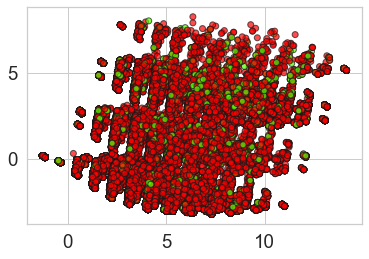

Precision score 0.15471923536439666
Recall score 0.0110179946398945
F1-score score 0.020571065485882216
Accuracy score 0.9373174841597218
Sensibilidade:  0.0110179946398945
Especificação:  0.9961751794827437


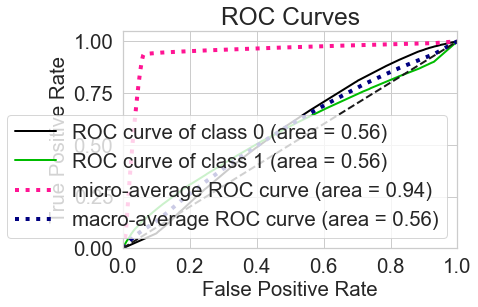

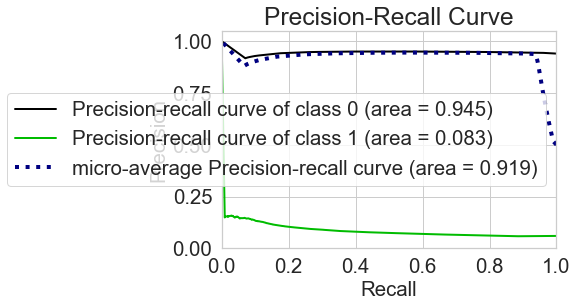

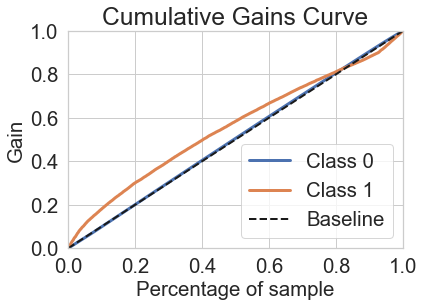

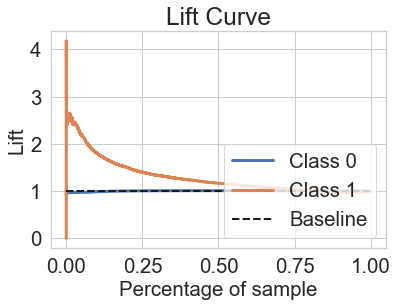

              precision    recall  f1-score   support

           0       0.94      1.00      0.97    369952
           1       0.15      0.01      0.02     23507

    accuracy                           0.94    393459
   macro avg       0.55      0.50      0.49    393459
weighted avg       0.89      0.94      0.91    393459



In [127]:
roc_auc_imb,fpr_imb,tpr_imb, _ = build_and_test(X_train, X_test, y_train, y_test)

- OverSample

In [128]:
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=42)
X_res, y_res = over_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({0: 750688, 1: 750688})
Testing target statistics: Counter({0: 369952, 1: 23507})


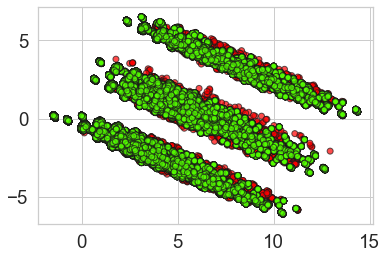

Precision score 0.08218053367702516
Recall score 0.3661887948270728
F1-score score 0.13423572341951784
Accuracy score 0.7177952467728531
Sensibilidade:  0.3661887948270728
Especificação:  0.7401365582562062


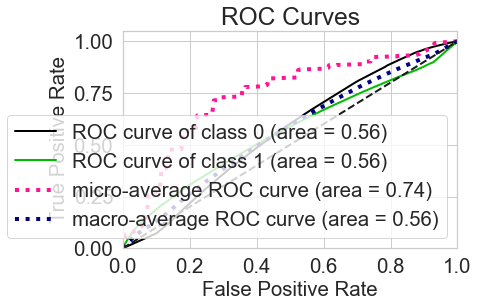

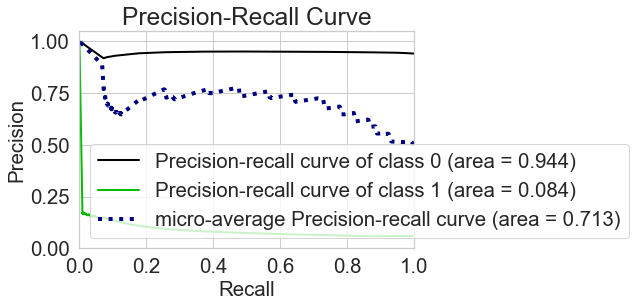

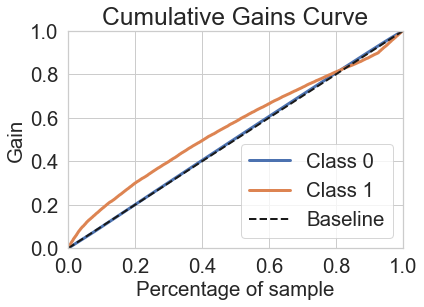

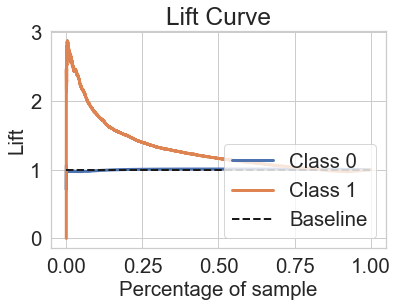

              precision    recall  f1-score   support

           0       0.95      0.74      0.83    369952
           1       0.08      0.37      0.13     23507

    accuracy                           0.72    393459
   macro avg       0.52      0.55      0.48    393459
weighted avg       0.90      0.72      0.79    393459



In [129]:
roc_auc_ros,fpr_ros,tpr_ros, _ = build_and_test(X_res, X_test, y_res, y_test)

- Smote

In [130]:
from imblearn.over_sampling import SMOTE
over_sampler = SMOTE(k_neighbors=2)
X_res, y_res = over_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({0: 750688, 1: 750688})
Testing target statistics: Counter({0: 369952, 1: 23507})


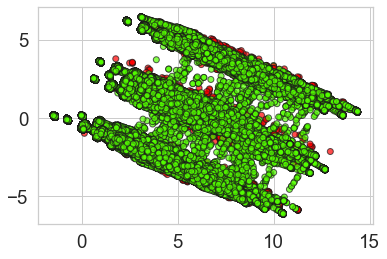

Precision score 0.08032057728794932
Recall score 0.32956140724039645
F1-score score 0.12916187332232948
Accuracy score 0.7344983848380644
Sensibilidade:  0.32956140724039645
Especificação:  0.7602283539486203


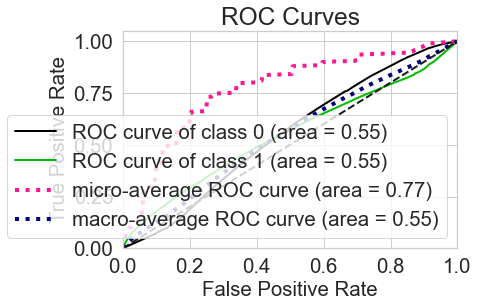

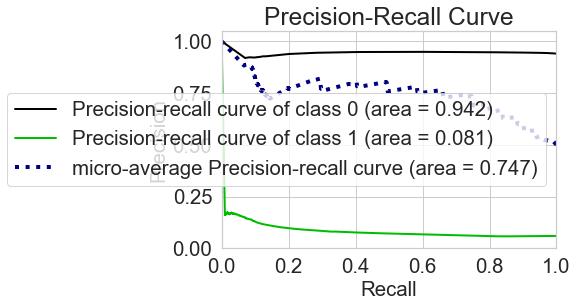

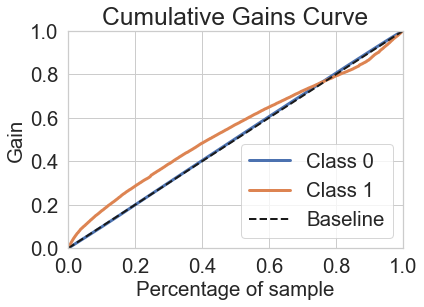

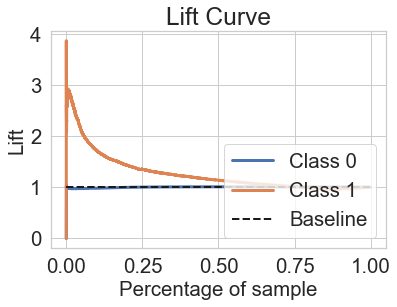

              precision    recall  f1-score   support

           0       0.95      0.76      0.84    369952
           1       0.08      0.33      0.13     23507

    accuracy                           0.73    393459
   macro avg       0.51      0.54      0.49    393459
weighted avg       0.90      0.73      0.80    393459



In [131]:
roc_auc_smote,fpr_smote,tpr_smote, _  = build_and_test(X_res, X_test, y_res, y_test)

- Undersample

In [139]:
from imblearn.under_sampling import RandomUnderSampler

under_sampler = RandomUnderSampler(random_state=42)
X_res, y_res = under_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({0: 48150, 1: 48150})
Testing target statistics: Counter({0: 369952, 1: 23507})


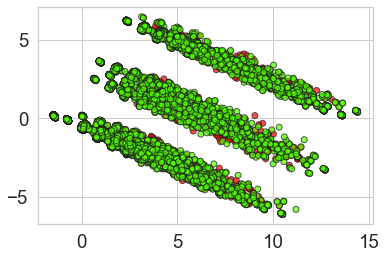

Precision score 0.08429818474012929
Recall score 0.39273407921044795
F1-score score 0.13880306413176668
Accuracy score 0.7088413278130631
Sensibilidade:  0.39273407921044795
Especificação:  0.7289269959346077


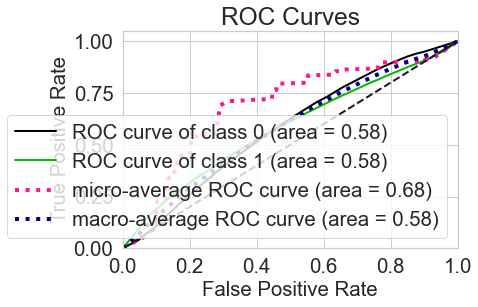

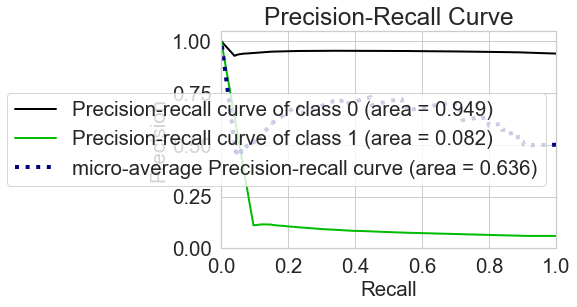

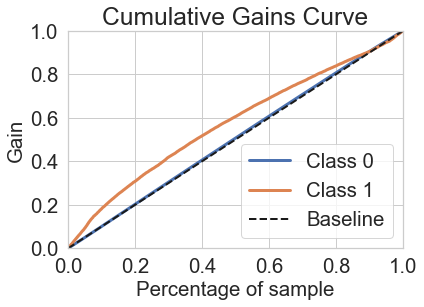

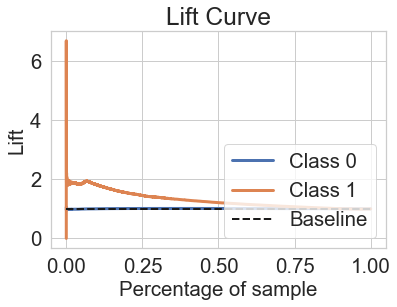

              precision    recall  f1-score   support

           0       0.95      0.73      0.82    369952
           1       0.08      0.39      0.14     23507

    accuracy                           0.71    393459
   macro avg       0.52      0.56      0.48    393459
weighted avg       0.90      0.71      0.78    393459



In [140]:
roc_auc_rus3,fpr_rus3,tpr_rus3 , _ = build_and_test(X_res, X_test, y_res, y_test)

- Near Miss Under Sampler

In [134]:
from imblearn.under_sampling import NearMiss

under_sampler = NearMiss()
X_res, y_res = under_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({0: 48150, 1: 48150})
Testing target statistics: Counter({0: 369952, 1: 23507})


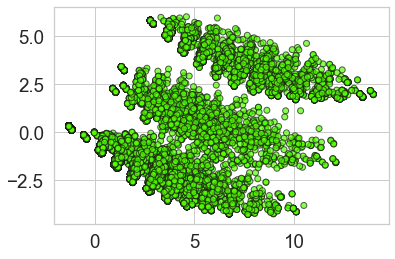

Precision score 0.06384559410953537
Recall score 0.5337559024971286
F1-score score 0.11404912102096097
Accuracy score 0.5045633725496176
Sensibilidade:  0.5337559024971286
Especificação:  0.5027084594758239


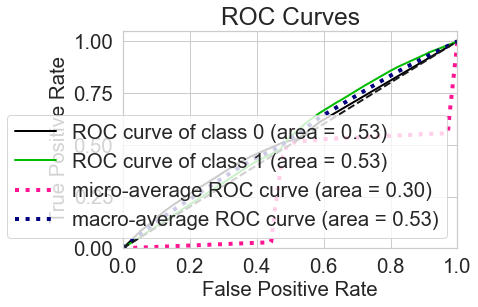

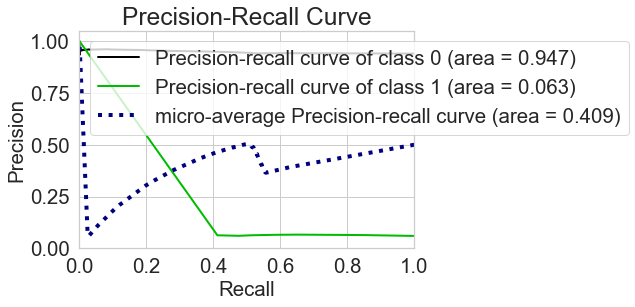

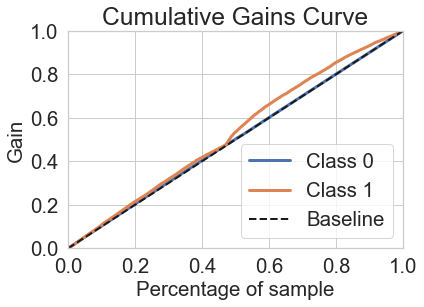

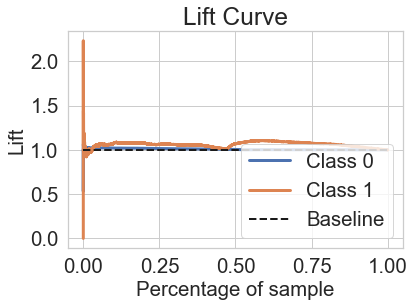

              precision    recall  f1-score   support

           0       0.94      0.50      0.66    369952
           1       0.06      0.53      0.11     23507

    accuracy                           0.50    393459
   macro avg       0.50      0.52      0.39    393459
weighted avg       0.89      0.50      0.62    393459



In [135]:
roc_auc_nm,fpr_nm,tpr_nm, _  = build_and_test(X_res, X_test, y_res, y_test)

- Class Weight

In [136]:
n= Counter(y_train)
ratio = int(n[0]/n[1])
ratio, n

(15, Counter({0: 750688, 1: 48150}))

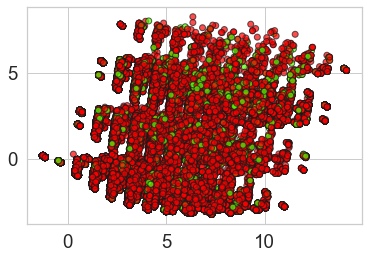

Precision score 0.08311597461649928
Recall score 0.3538095035521334
F1-score score 0.1346097821512964
Accuracy score 0.7282105632353053
Sensibilidade:  0.3538095035521334
Especificação:  0.7520002594931234


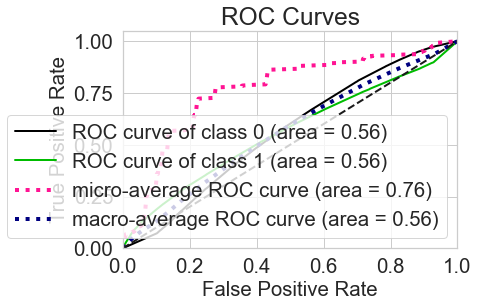

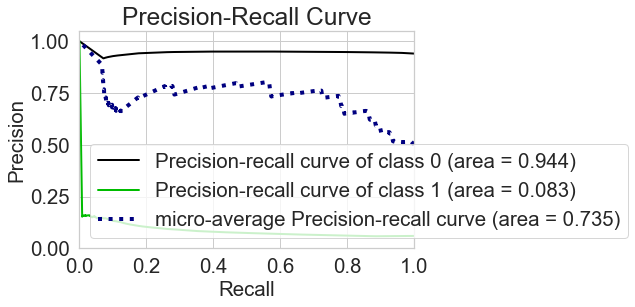

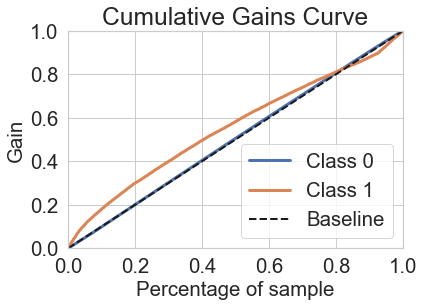

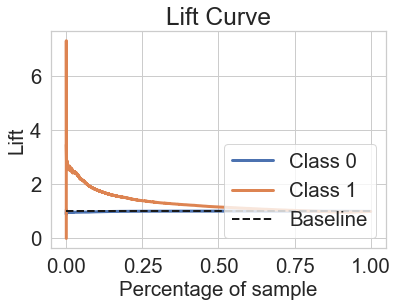

              precision    recall  f1-score   support

           0       0.95      0.75      0.84    369952
           1       0.08      0.35      0.13     23507

    accuracy                           0.73    393459
   macro avg       0.52      0.55      0.49    393459
weighted avg       0.90      0.73      0.80    393459



In [137]:
roc_auc_cw,fpr_cw,tpr_cw, _  = build_and_test(X_train, X_test, y_train, y_test, class_weight={0:1, 1:ratio})

- Threshold

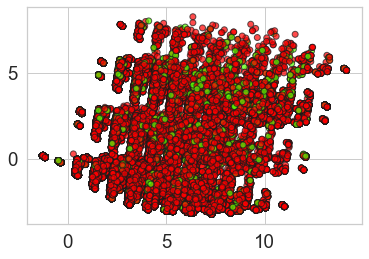

Precision score 0.15089820359281436
Recall score 0.010720211000978431
F1-score score 0.0200182706438416
Accuracy score 0.9372920685509799
Sensibilidade:  0.010720211000978431
Especificação:  0.9961670703226364


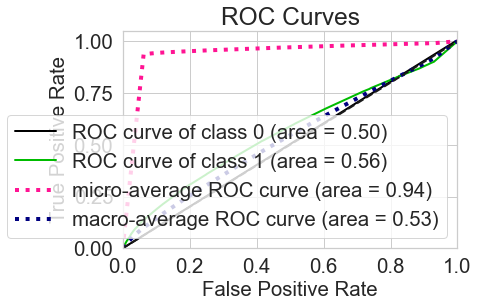

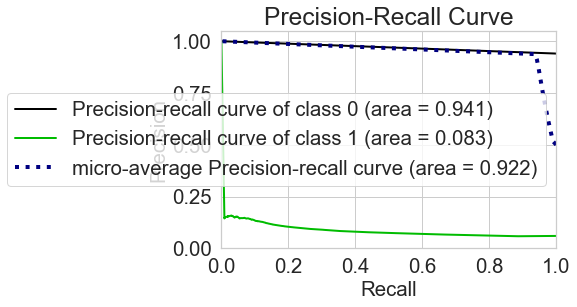

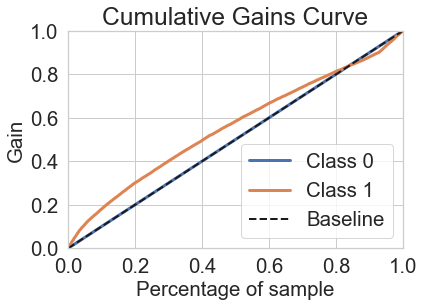

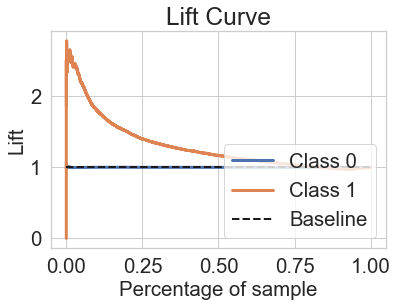

              precision    recall  f1-score   support

           0       0.94      1.00      0.97    369952
           1       0.15      0.01      0.02     23507

    accuracy                           0.94    393459
   macro avg       0.55      0.50      0.49    393459
weighted avg       0.89      0.94      0.91    393459

Best Treshold: 0.06111111111111111


In [138]:
roc_auc_thr,fpr_thr,tpr_thr, threshold = build_and_test(X_train, X_test, y_train, y_test, threshold=True)
print(f"Best Treshold: {threshold}")

- Plot

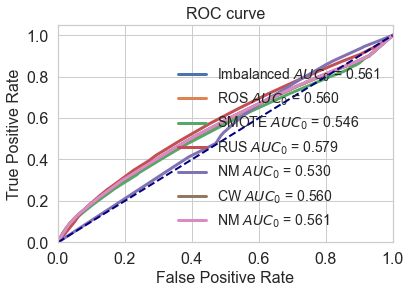

In [99]:
plt.plot(fpr_imb, tpr_imb, lw=3, label='Imbalanced $AUC_0$ = %.3f' % (roc_auc_imb))
plt.plot(fpr_ros, tpr_ros, lw=3, label='ROS $AUC_0$ = %.3f' % (roc_auc_ros))
plt.plot(fpr_smote, tpr_smote, lw=3, label='SMOTE $AUC_0$ = %.3f' % (roc_auc_smote))
plt.plot(fpr_rus, tpr_rus, lw=3, label='RUS $AUC_0$ = %.3f' % (roc_auc_rus))
plt.plot(fpr_nm, tpr_nm, lw=3, label='NM $AUC_0$ = %.3f' % (roc_auc_nm))
plt.plot(fpr_cw, tpr_cw, lw=3, label='CW $AUC_0$ = %.3f' % (roc_auc_cw))
plt.plot(fpr_thr, tpr_thr, lw=3, label='NM $AUC_0$ = %.3f' % (roc_auc_thr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

# Comparação em RF, LGT, DT ✅

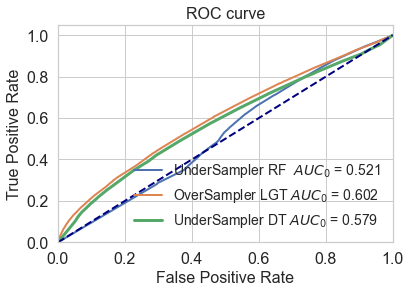

In [141]:

plt.plot(fpr_rus1, tpr_rus1, lw=2, label='UnderSampler RF  $AUC_0$ = %.3f' % (roc_auc_rus1))
plt.plot(fpr_ros2, tpr_ros2, lw=2, label='OverSampler LGT $AUC_0$ = %.3f' % (roc_auc_ros2))
plt.plot(fpr_rus3, tpr_rus3, lw=3, label='UnderSampler DT $AUC_0$ = %.3f' % (roc_auc_rus3))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()